Cost of Climate Change for France
------

# Papers in Piontek et al. 2021

## Roson and Satori 2016

Even though some data on productivity loss due to heat, SLR, etc. are available in the Supp. Mat., only the 3°C value is avalaible relative to GDP

In [17]:
data = [
    {"Authors": "Roson and Satori", "Paper year": 2016, "Year": 2100, 'Warming': 3, "Country": "France", "Sector": "SLR", "GDP Loss (%)": 0},
    {"Authors": "Roson and Satori", "Paper year": 2016, "Year": 2100, 'Warming': 3, "Country": "France", "Sector": "Agriculture", "GDP Loss (%)": 0.0002},
    {"Authors": "Roson and Satori", "Paper year": 2016, "Year": 2100, 'Warming': 3, "Country": "France", "Sector": "Heat", "GDP Loss (%)": 0},
    {"Authors": "Roson and Satori", "Paper year": 2016, "Year": 2100, 'Warming': 3, "Country": "France", "Sector": "Health", "GDP Loss (%)": -0.0501},
    {"Authors": "Roson and Satori", "Paper year": 2016, "Year": 2100, 'Warming': 3, "Country": "France", "Sector": "Tourism", "GDP Loss (%)": 0.3515},
    {"Authors": "Roson and Satori", "Paper year": 2016, "Year": 2100, 'Warming': 3, "Country": "France", "Sector": "All", "GDP Loss (%)": 0.30}
]
df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Region'] = 'France'
df['Method']="Direct impacts"

df_Roson2016=df
df_Roson2016

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Roson and Satori,2016,2100,3,France,SLR,0.0000,Scientific paper,France,Direct impacts
1,Roson and Satori,2016,2100,3,France,Agriculture,0.0002,Scientific paper,France,Direct impacts
2,Roson and Satori,2016,2100,3,France,Heat,0.0000,Scientific paper,France,Direct impacts
3,Roson and Satori,2016,2100,3,France,Health,-0.0501,Scientific paper,France,Direct impacts
4,Roson and Satori,2016,2100,3,France,Tourism,0.3515,Scientific paper,France,Direct impacts
5,Roson and Satori,2016,2100,3,France,All,0.3000,Scientific paper,France,Direct impacts


## Takakura et al. 2019

- Values are available for different SSPs and different years.
- It has been chose to have only 2100 since different warming level can be obtained through RCPs.
- Only SSP3 have been used to have maximum GDP value.

In [18]:
import pandas as pd

file_path = 'Takakura et al. 2019/EconomicImpact.csv'
data = pd.read_csv(file_path)

cost_europe = data[data['REGION']=='Europe'][['REGION','SSP','RCP','GCM','SECTOR','YEAR','Impact(percentage of GDP)']]
# We choose to analyse the results based on SSP2 in 2050
df = cost_europe[(cost_europe['YEAR']==2099)&(cost_europe['SSP']=='SSP3')]
# Group by the required columns (e.g., REGION, SSP, RCP, SECTOR, YEAR) and calculate the median across GCM
df = df.groupby(['REGION', 'SSP', 'RCP', 'SECTOR', 'YEAR'])['Impact(percentage of GDP)'].median().reset_index()
df['Authors']='Takakura et al.'
df['Paper year']=2019

new_column_names = {
    "REGION": "Country",
    "RCP": "Warming - Original",
    "SECTOR": "Sector",
    "YEAR": "Year",
    "Impact(percentage of GDP)": "GDP Loss (%)",
}

# Rename the columns using the rename method
df = df.rename(columns=new_column_names)
df= df[['Authors','Paper year','Year','Warming - Original','Country','Sector','GDP Loss (%)']]
df['GDP Loss (%)']=-df['GDP Loss (%)']

# Group by Warming (RCP) and sum the GDP Loss for each group
sums_by_rcp = df.groupby("Warming - Original")["GDP Loss (%)"].sum().reset_index()

# Add the "all sectors" row for each RCP
all_sectors = pd.DataFrame({
    "Authors": ["Takakura et al."] * len(sums_by_rcp),
    "Paper year": [2019] * len(sums_by_rcp),
    "Year": [2099] * len(sums_by_rcp),
    "Warming - Original": sums_by_rcp["Warming - Original"],
    "Country": ["Europe"] * len(sums_by_rcp),
    "Sector": ["All"] * len(sums_by_rcp),
    "GDP Loss (%)": sums_by_rcp["GDP Loss (%)"]
})

# Append the new rows to the original DataFrame
df = pd.concat([df, all_sectors], ignore_index=True)

# Append the new rows to the original DataFrame
# Map the Warming - Original values to the new Warming values
warming_mapping = {
    "RCP2.6": 1.8,
    "RCP4.5": 2.7,
    "RCP6.0": 2.9,
    "RCP8.5": 4.4
}

df["Warming"] = df["Warming - Original"].map(warming_mapping)
df['Type'] = 'Scientific paper'
df['Region'] = 'Europe'
df['Method']="Direct impacts"


df_Takakura2019=df
df_Takakura2019

,Authors,Paper year,Year,Warming - Original,Country,Sector,GDP Loss (%),Warming,Type,Region,Method
0,Takakura et al.,2019,2099,RCP2.6,Europe,Agricultural productivity,0.037592,1.8,Scientific paper,Europe,Direct impacts
1,Takakura et al.,2019,2099,RCP2.6,Europe,Coastal innundation,-0.009730,1.8,Scientific paper,Europe,Direct impacts
2,Takakura et al.,2019,2099,RCP2.6,Europe,Cooling/heating demand,-0.961322,1.8,Scientific paper,Europe,Direct impacts
3,Takakura et al.,2019,2099,RCP2.6,Europe,Fluvial flood,-0.001499,1.8,Scientific paper,Europe,Direct impacts
4,Takakura et al.,2019,2099,RCP2.6,Europe,Heat-related excess mortality,-0.303732,1.8,Scientific paper,Europe,Direct impacts
5,Takakura et al.,2019,2099,RCP2.6,Europe,Hydropower generation,-0.000449,1.8,Scientific paper,Europe,Direct impacts
6,Takakura et al.,2019,2099,RCP2.6,Europe,Occupational-health cost,0.103756,1.8,Scientific paper,Europe,Direct impacts
7,Takakura et al.,2019,2099,RCP2.6,Europe,Thermalpower generation,-0.057133,1.8,Scientific paper,Europe,Direct impacts
8,Takakura et al.,2019,2099,RCP2.6,Europe,Undernourishment,-0.064624,1.8,Scientific paper,Europe,Direct impacts
9,Takakura et al.,2019,2099,RCP4.5,Europe,Agricultural productivity,-0.001604,2.7,Scientific paper,Europe,Direct impacts


## Bosello et al. 2012

Figure 4 is extracted. France is a mix of MEUR and NEUR. Data are computed for +1.92°C in 2050.

In [19]:
data = {
    "Sector": [
        "All", 
        "Energy Demand", 
        "Tourism", 
        "SLR", 
        "Floodings", 
        "Agriculture", 
        "Forestry", 
        "Health"
    ],
    "MEUR (%)": [
        -0.15,  # All impacts
        -0.05,  # Energy Demand
        0.07,   # Tourism
        -0.02,  # SLR
        -0.005,  # Floodings
        0.06,   # Agriculture
        -0.005,   # Forestry
        -0.19   # Health
    ],
    "NEUR (%)": [
        0.18,   # All impacts
        -0.07,  # Energy Demand
        0.15,   # Tourism
        -0.11,   # SLR
        -0.01,  # Floodings
        +0.23,   # Agriculture
        0.00,   # Forestry
        0   # Health
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Reshape the data into the desired format
df = df.melt(
    id_vars=["Sector"], 
    value_vars=["MEUR (%)", "NEUR (%)"], 
    var_name="Country", 
    value_name="GDP Loss (%)"
)

# Adjust country names to be "MEUR" or "NEUR"
df["Country"] = df["Country"].str.replace(" (%)", "")

df["Authors"] = "Bosello et al."
df["Paper year"] = 2012

df['Year'] = 2050
df['Warming'] = 1.92
df=df[['Authors','Paper year','Year','Warming','Country','Sector','GDP Loss (%)']]
df['Type'] = 'Scientific paper'
df['Region'] = 'Europe'
df['Method']="Final impacts (bottom-up + sector interactions)"


df_Bosello2012=df
df_Bosello2012

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Bosello et al.,2012,2050,1.92,MEUR,All,-0.150,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
1,Bosello et al.,2012,2050,1.92,MEUR,Energy Demand,-0.050,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
2,Bosello et al.,2012,2050,1.92,MEUR,Tourism,0.070,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
3,Bosello et al.,2012,2050,1.92,MEUR,SLR,-0.020,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
4,Bosello et al.,2012,2050,1.92,MEUR,Floodings,-0.005,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
5,Bosello et al.,2012,2050,1.92,MEUR,Agriculture,0.060,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
6,Bosello et al.,2012,2050,1.92,MEUR,Forestry,-0.005,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
7,Bosello et al.,2012,2050,1.92,MEUR,Health,-0.190,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
8,Bosello et al.,2012,2050,1.92,NEUR,All,0.180,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
9,Bosello et al.,2012,2050,1.92,NEUR,Energy Demand,-0.070,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)


## Kompas et al. 2018

In [20]:
# Degree = Warming in 2100

data = [

    # Degree-based data

    {"Warming": 1, "Year": 2100, "GDP Loss (%)": -0.139, "Country": "France"},

    {"Warming": 2, "Year": 2100, "GDP Loss (%)": -0.285, "Country": "France"},

    {"Warming": 3, "Year": 2100, "GDP Loss (%)": -0.455, "Country": "France"},

    {"Warming": 4, "Year": 2100, "GDP Loss (%)": -0.662, "Country": "France"},

    # Year-based data for 3°C scenario

    {"Original - Warming": 3, "Warming" :1.3  ,"Year": 2027, "GDP Loss (%)": +0.048, "Country": "France"},

    {"Original - Warming": 3,"Warming" : 1.5 , "Year": 2037, "GDP Loss (%)": +0.088, "Country": "France"},

    {"Original - Warming": 3, "Warming" : 1.8 ,"Year": 2047, "GDP Loss (%)": +0.117, "Country": "France"},

    {"Original - Warming": 3, "Warming" : 2.2 ,"Year": 2067, "GDP Loss (%)": +0.141, "Country": "France"}
]

df = pd.DataFrame(data)
df['Authors'] = 'Kompas et al.'
df['Paper year'] = 2018
df['Sector'] = 'All'
df = df[['Authors', 'Paper year', 'Year', 'Warming', 'Country', 'Sector', 'GDP Loss (%)']]
df['Type'] = 'Scientific paper'
df['Region'] = 'France'
df['Method']="Final impacts (bottom-up + sector interactions)"


df_Kompas2018 = df
df_Kompas2018

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Kompas et al.,2018,2100,1.0,France,All,-0.139,Scientific paper,France,Final impacts (bottom-up + sector interactions)
1,Kompas et al.,2018,2100,2.0,France,All,-0.285,Scientific paper,France,Final impacts (bottom-up + sector interactions)
2,Kompas et al.,2018,2100,3.0,France,All,-0.455,Scientific paper,France,Final impacts (bottom-up + sector interactions)
3,Kompas et al.,2018,2100,4.0,France,All,-0.662,Scientific paper,France,Final impacts (bottom-up + sector interactions)
4,Kompas et al.,2018,2027,1.3,France,All,0.048,Scientific paper,France,Final impacts (bottom-up + sector interactions)
5,Kompas et al.,2018,2037,1.5,France,All,0.088,Scientific paper,France,Final impacts (bottom-up + sector interactions)
6,Kompas et al.,2018,2047,1.8,France,All,0.117,Scientific paper,France,Final impacts (bottom-up + sector interactions)
7,Kompas et al.,2018,2067,2.2,France,All,0.141,Scientific paper,France,Final impacts (bottom-up + sector interactions)


## Dellink et al. 2019

France is among EU 4 Large (= France, Germany, Italy, UK).

Figure 4 --> EU large 4 aggregated from 2010 to 2060 trajectory.

Figure 5 --> EU large 4 by sector in 2060 +2.5°C. Data have been obtained through ImageJ.

In [21]:
# Create a DataFrame with the specified columns and 5 rows
data = [
    {"Country": "EU 4 Large", "Year": 2060, "Warming": 2.5, "Sector": "All", "GDP Loss (%)": -0.14},
    {"Country": "EU 4 Large", "Year": 2060, "Warming": 2.5, "Sector": "Health", "GDP Loss (%)": -0.04},
    {"Country": "EU 4 Large", "Year": 2060, "Warming": 2.5, "Sector": "Energy Demand", "GDP Loss (%)": -0.03},
    {"Country": "EU 4 Large", "Year": 2060, "Warming": 2.5, "Sector": "Coastal Zones", "GDP Loss (%)": -0.02},
    {"Country": "EU 4 Large", "Year": 2060, "Warming": 2.5, "Sector": "Agriculture", "GDP Loss (%)": -0.05},
]

df = pd.DataFrame(data)
df['Authors'] = 'Dellink et al.'
df['Paper year'] = 2019
df = df[['Authors', 'Paper year', 'Year', 'Warming', 'Country', 'Sector', 'GDP Loss (%)']]
df['Type'] = 'Scientific paper'
df['Region'] = 'Europe'
df['Method']="Final impacts (bottom-up + sector interactions)"

df_Dellink2019 = df
df_Dellink2019

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Dellink et al.,2019,2060,2.5,EU 4 Large,All,-0.14,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
1,Dellink et al.,2019,2060,2.5,EU 4 Large,Health,-0.04,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
2,Dellink et al.,2019,2060,2.5,EU 4 Large,Energy Demand,-0.03,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
3,Dellink et al.,2019,2060,2.5,EU 4 Large,Coastal Zones,-0.02,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
4,Dellink et al.,2019,2060,2.5,EU 4 Large,Agriculture,-0.05,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)


## Burke et al. 2015


0 % based on Fig4a, in 2100 for RCP8.5.

In [22]:
data_new = {
    "Authors": ["Burke et al."],
    "Paper year": [2015],
    "Year": [2100],
    "Warming - Original": ["RCP8.5"],
    "Warming": [4.4],
    "Country": ["France"],
    "Sector": ["All"],
    "GDP Loss (%)": [0]
}

df = pd.DataFrame(data_new)
df['Type'] = 'Scientific paper'
df['Region'] = 'France'
df['Method']="Final impacts (econometrics)"

df_Burke2015=df
df_Burke2015

,Authors,Paper year,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Burke et al.,2015,2100,RCP8.5,4.4,France,All,0,Scientific paper,France,Final impacts (econometrics)


## Pretis et al. 2018

0 % based on Fig5 and Fig6 --> economic impact is not significant for France.

In [23]:
data = [
    {"Authors": "Pretis et al.", "Paper year": 2018, "Year": 2100, 'Warming': 1.5, "Country": "France", "Sector": "All", "GDP Loss (%)": 0},
    {"Authors": "Pretis et al.", "Paper year": 2018, "Year": 2100, 'Warming': 2, "Country": "France", "Sector": "All", "GDP Loss (%)": 0}
]
df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Region'] = 'France'
df['Method']="Final impacts (econometrics)"

df_Pretis2018 = df
df_Pretis2018

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Pretis et al.,2018,2100,1.5,France,All,0,Scientific paper,France,Final impacts (econometrics)
1,Pretis et al.,2018,2100,2.0,France,All,0,Scientific paper,France,Final impacts (econometrics)


## Kalkuhl and Wenz 2020

In [24]:
# from : https://www.insee.fr/fr/outil-interactif/5367857/details/territoires/10_ECC/11_ECO/11I_FigureT1 (2022 data)
regions_gdp = {
    "Île-de-France": 782639,
    "Auvergne-Rhône-Alpes": 304681,
    "Provence-Alpes-Côte d'Azur": 206744,
    "Nouvelle-Aquitaine": 199575,
    "Occitanie": 193064,
    "Hauts-de-France": 185472,
    "Grand Est": 178925,
    "Pays de la Loire": 137051,
    "Bretagne": 115184,
    "Normandie": 107192,
    "Bourgogne-Franche-Comté": 87549,
    "Centre-Val de Loire": 79992,
    "Corse": 10304
}

# Calculating the total population
total_gdp = sum(regions_gdp.values())

# Calculating shares
regions_shares = {region: gdp / total_gdp for region, gdp in regions_gdp.items()}

# For regions 

regions_impact_max = {
    "Île-de-France": 5,
    "Auvergne-Rhône-Alpes": 10,
    "Provence-Alpes-Côte d'Azur": 10,
    "Nouvelle-Aquitaine": 10,
    "Occitanie": 10,
    "Hauts-de-France": 5,
    "Grand Est": 5,
    "Pays de la Loire": 5,
    "Bretagne": 5,
    "Normandie": 5,
    "Bourgogne-Franche-Comté": 10,
    "Centre-Val de Loire": 5,
    "Corse": 10
}

regions_impact_min = {
    "Île-de-France": 0,
    "Auvergne-Rhône-Alpes": 5,
    "Provence-Alpes-Côte d'Azur": 5,
    "Nouvelle-Aquitaine": 5,
    "Occitanie": 5,
    "Hauts-de-France": 0,
    "Grand Est": 0,
    "Pays de la Loire": 0,
    "Bretagne": 0,
    "Normandie": 0,
    "Bourgogne-Franche-Comté": 5,
    "Centre-Val de Loire": 0,
    "Corse": 5
}

max_impact = {region: regions_shares[region] * impact for region, impact in regions_impact_max.items()}
min_impact = {region: regions_shares[region] * impact for region, impact in regions_impact_min.items()}

# Displaying the result
max_impact = sum(max_impact.values())
min_impact = sum(min_impact.values())

data = [
    {"Authors": "Kalkuhl and Wenz", "Paper year": 2020, "Year": 2100, 'Warming - Original' : "RCP8.5" ,"Warming":4.4, "Country":"France","Sector":"All", "GDP Loss (%)": -1.9},
    {"Authors": "Kalkuhl and Wenz", "Paper year": 2020, "Year": 2100, 'Warming - Original' : "RCP8.5" ,"Warming":4.4, "Country":"France","Sector":"All", "GDP Loss (%)": -6.9},
]
df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Region'] = 'France'
df['Method']="Final impacts (econometrics)"

df_Kalkuhl2020 =df
df_Kalkuhl2020

,Authors,Paper year,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Kalkuhl and Wenz,2020,2100,RCP8.5,4.4,France,All,-1.9,Scientific paper,France,Final impacts (econometrics)
1,Kalkuhl and Wenz,2020,2100,RCP8.5,4.4,France,All,-6.9,Scientific paper,France,Final impacts (econometrics)


## Acevedo et al. 2021

In [25]:
data = [
    {"Authors": "Acevedo et al.", "Paper year": 2021, "Year": 2100, 'Warming' :+1 , "Country":"France","Sector":"All", "GDP Loss (%)": 0},
]
df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Region'] = 'France'
df['Method']="Final impacts (econometrics)"

df_Acevedo2021 =df
df_Acevedo2021

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Acevedo et al.,2021,2100,1,France,All,0,Scientific paper,France,Final impacts (econometrics)


## Kahn et al. 2021

Results can be obtained from Mohaddes & Raissi 2024 data.

In Kahn et al. 2021, only m = 30, RCP2.6 and RCP8.5 are used.

We can extract values for France for 2050 and 2100.

In [26]:
data = [
    {"Authors": "Kahn et al.", "Paper year": 2021, "Year": 2050, 'Warming - Original' : "RCP2.6" , 'Warming':1.7,"Country":"France","Sector":"All", "GDP Loss (%)": +0.22},
    {"Authors": "Kahn et al.","Paper year": 2021, "Year": 2100, 'Warming - Original' : "RCP2.6" , 'Warming':1.8,"Country":"France","Sector":"All", "GDP Loss (%)": +0.42},

    {"Authors": "Kahn et al.","Paper year": 2021, "Year": 2050,'Warming - Original' : "RCP8.5" , 'Warming':2.4,"Country":"France","Sector":"All", "GDP Loss (%)": -1.41},
    {"Authors": "Kahn et al.","Paper year": 2021, "Year": 2100, 'Warming - Original' : "RCP8.5" , 'Warming':4.4,"Country":"France","Sector":"All", "GDP Loss (%)": -4.35}
]
df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Region'] = 'France'
df['Method']="Final impacts (econometrics)"

df_Kahn2021 =df
df_Kahn2021

,Authors,Paper year,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Kahn et al.,2021,2050,RCP2.6,1.7,France,All,0.22,Scientific paper,France,Final impacts (econometrics)
1,Kahn et al.,2021,2100,RCP2.6,1.8,France,All,0.42,Scientific paper,France,Final impacts (econometrics)
2,Kahn et al.,2021,2050,RCP8.5,2.4,France,All,-1.41,Scientific paper,France,Final impacts (econometrics)
3,Kahn et al.,2021,2100,RCP8.5,4.4,France,All,-4.35,Scientific paper,France,Final impacts (econometrics)


# Papers in IPCC WGII 2023

## Roson & van der Mensbrugghe 2012

Figure 7 --> EU by sector in 2100 +2.5°C. Data have been obtained through ImageJ.

In [27]:
data = [
    {"Authors": "Roson & van der Mensbrugghe", "Paper year": 2012, "Year": 2100, 'Warming' : 4.8 , "Country":"Europe","Sector":"Agriculture", "GDP Loss (%)": -0.11},
    {"Authors": "Roson & van der Mensbrugghe", "Paper year": 2012, "Year": 2100, 'Warming' : 4.8 , "Country":"Europe","Sector":"Water", "GDP Loss (%)": 0.4},
    {"Authors": "Roson & van der Mensbrugghe", "Paper year": 2012, "Year": 2100, 'Warming' : 4.8 , "Country":"Europe","Sector":"Tourism", "GDP Loss (%)": 0.06},
    {"Authors": "Roson & van der Mensbrugghe", "Paper year": 2012, "Year": 2100, 'Warming' : 4.8 , "Country":"Europe","Sector":"Energy Demand", "GDP Loss (%)": 0},
    {"Authors": "Roson & van der Mensbrugghe", "Paper year": 2012, "Year": 2100, 'Warming' : 4.8 , "Country":"Europe","Sector":"Labour Productivity", "GDP Loss (%)": 0.78},
    {"Authors": "Roson & van der Mensbrugghe", "Paper year": 2012, "Year": 2100, 'Warming' : 4.8 , "Country":"Europe","Sector":"SLR", "GDP Loss (%)": 0.04},
    {"Authors": "Roson & van der Mensbrugghe", "Paper year": 2012, "Year": 2100, 'Warming' : 4.8 , "Country":"Europe","Sector":"All", "GDP Loss (%)": 1.17}
]
df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Region'] = 'Europe'
df['Method']="Final impacts (bottom-up + sector interactions)"

df_Roson2012 =df
df_Roson2012

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Roson & van der Mensbrugghe,2012,2100,4.8,Europe,Agriculture,-0.11,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
1,Roson & van der Mensbrugghe,2012,2100,4.8,Europe,Water,0.40,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
2,Roson & van der Mensbrugghe,2012,2100,4.8,Europe,Tourism,0.06,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
3,Roson & van der Mensbrugghe,2012,2100,4.8,Europe,Energy Demand,0.00,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
4,Roson & van der Mensbrugghe,2012,2100,4.8,Europe,Labour Productivity,0.78,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
5,Roson & van der Mensbrugghe,2012,2100,4.8,Europe,SLR,0.04,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
6,Roson & van der Mensbrugghe,2012,2100,4.8,Europe,All,1.17,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)


## Burke et al. 2018

Code needs to be run on R !

## Rose et al. 2017

In [28]:
data = [
    {"Authors": "Rose et al.","Paper year": 2017, "Year": 2050, 'Warming' : 1 , "Country":"Western Europe","Sector":"All", "GDP Loss (%)": +0.043,"Comment":"FUND"},
    {"Authors": "Rose et al.","Paper year": 2017, "Year": 2050, 'Warming' : 2 , "Country":"Western Europe","Sector":"All", "GDP Loss (%)": +0.022,"Comment":"FUND"},
    {"Authors": "Rose et al.","Paper year": 2017, "Year": 2050, 'Warming' : 3 , "Country":"Western Europe","Sector":"All", "GDP Loss (%)": -0.029,"Comment":"FUND"},
    {"Authors": "Rose et al.","Paper year": 2017, "Year": 2050, 'Warming' : 4 , "Country":"Western Europe","Sector":"All", "GDP Loss (%)": -0.113,"Comment":"FUND"},
    {"Authors": "Rose et al.","Paper year": 2017, "Year": 2050, 'Warming' : 5 , "Country":"Western Europe","Sector":"All", "GDP Loss (%)": -0.225,"Comment":"FUND"},
    {"Authors": "Rose et al.","Paper year": 2017, "Year": 2050, 'Warming' : 1 , "Country":"EU","Sector":"All", "GDP Loss (%)": -0.070,"Comment":"PAGE"},
    {"Authors": "Rose et al.","Paper year": 2017, "Year": 2050, 'Warming' : 2 , "Country":"EU","Sector":"All", "GDP Loss (%)": -0.167,"Comment":"PAGE"},
    {"Authors": "Rose et al.","Paper year": 2017, "Year": 2050, 'Warming' : 3 , "Country":"EU","Sector":"All", "GDP Loss (%)": -0.357,"Comment":"PAGE"},
    {"Authors": "Rose et al.","Paper year": 2017, "Year": 2050, 'Warming' : 4 , "Country":"EU","Sector":"All", "GDP Loss (%)": -0.700,"Comment":"PAGE"},
    {"Authors": "Rose et al.","Paper year": 2017, "Year": 2050, 'Warming' : 5 , "Country":"EU","Sector":"All", "GDP Loss (%)": -1.174,"Comment":"PAGE"}
]
df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Region'] = 'Europe'
df['Method']="Damage functions"

df_Rose2017 =df
df_Rose2017

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Comment,Type,Region,Method
0,Rose et al.,2017,2050,1,Western Europe,All,0.043,FUND,Scientific paper,Europe,Damage functions
1,Rose et al.,2017,2050,2,Western Europe,All,0.022,FUND,Scientific paper,Europe,Damage functions
2,Rose et al.,2017,2050,3,Western Europe,All,-0.029,FUND,Scientific paper,Europe,Damage functions
3,Rose et al.,2017,2050,4,Western Europe,All,-0.113,FUND,Scientific paper,Europe,Damage functions
4,Rose et al.,2017,2050,5,Western Europe,All,-0.225,FUND,Scientific paper,Europe,Damage functions
5,Rose et al.,2017,2050,1,EU,All,-0.070,PAGE,Scientific paper,Europe,Damage functions
6,Rose et al.,2017,2050,2,EU,All,-0.167,PAGE,Scientific paper,Europe,Damage functions
7,Rose et al.,2017,2050,3,EU,All,-0.357,PAGE,Scientific paper,Europe,Damage functions
8,Rose et al.,2017,2050,4,EU,All,-0.700,PAGE,Scientific paper,Europe,Damage functions
9,Rose et al.,2017,2050,5,EU,All,-1.174,PAGE,Scientific paper,Europe,Damage functions


# Other papers since

## Kotz et al. 2024

See NGFS 2024 for these values used to get a country GDP change value.

In [90]:
import pandas as pd

# Define the file path
file_path_low = 'Kotz et al. 2024/UTF-8KLW24_nat_dams_ssp126_median.csv'
file_path_high = 'Kotz et al. 2024/UTF-8KLW24_nat_dams_ssp585_median.csv'

df_kotz2024_ssp1_RCP26 = pd.read_csv(file_path_low, index_col=0)
df_kotz2024_ssp5_RCP85 = pd.read_csv(file_path_high, index_col=0)

data = [
  {"Authors": "Kotz et al.","Paper year": 2024, "Year": 2050, 'Warming - Original' : "RCP2.6" , "Warming" : 1.7,"Country":"France","Sector":"All", "GDP Loss (%)": df_kotz2024_ssp1_RCP26[df_kotz2024_ssp1_RCP26['GID_0'] == 'FRA']['2050'].iloc[0]
},
  {"Authors": "Kotz et al.","Paper year": 2024, "Year": 2100, 'Warming - Original' : "RCP2.6" , "Warming": 1.8, "Country":"France","Sector":"All", "GDP Loss (%)": df_kotz2024_ssp1_RCP26[df_kotz2024_ssp1_RCP26['GID_0'] == 'FRA']['2099'].iloc[0]
},
  {"Authors": "Kotz et al.","Paper year": 2024, "Year": 2050, 'Warming - Original' : "RCP8.5" , "Warming" : 2.4,"Country":"France","Sector":"All", "GDP Loss (%)": df_kotz2024_ssp5_RCP85[df_kotz2024_ssp5_RCP85['GID_0'] == 'FRA']['2050'].iloc[0]
},
  {"Authors": "Kotz et al.","Paper year": 2024, "Year": 2100, 'Warming - Original' : "RCP8.5" , "Warming": 4.4, "Country":"France","Sector":"All", "GDP Loss (%)": df_kotz2024_ssp5_RCP85[df_kotz2024_ssp5_RCP85['GID_0'] == 'FRA']['2099'].iloc[0]
}

]
df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Region'] = 'France'
df['Method']="Final impacts (econometrics)"

df_Kotz2024 =df
df_Kotz2024

,Authors,Paper year,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Kotz et al.,2024,2050,RCP2.6,1.7,France,All,-11.323161,Scientific paper,France,Final impacts (econometrics)
1,Kotz et al.,2024,2100,RCP2.6,1.8,France,All,-11.685872,Scientific paper,France,Final impacts (econometrics)
2,Kotz et al.,2024,2050,RCP8.5,2.4,France,All,-15.808400,Scientific paper,France,Final impacts (econometrics)
3,Kotz et al.,2024,2100,RCP8.5,4.4,France,All,-46.682158,Scientific paper,France,Final impacts (econometrics)


## Van Der Wijst et al. 2023

In [30]:
data = [
  {"Authors": "Van Der Wijst et al.","Paper year": 2023, "Year": 2100, 'Warming - Original' : "RCP6.0" , "Warming" : 2.9,"Country":"Europe and North America","Sector":"All", "GDP Loss (%)": -5.17},
  {"Authors": "Van Der Wijst et al.","Paper year": 2023, "Year": 2100, 'Warming - Original' : "RCP2.6" , "Warming": 1.8, "Country":"Europe and North America","Sector":"All", "GDP Loss (%)": -1.58}]
df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Region'] = 'Europe'
df['Method']="Final impacts (bottom-up + sector interactions)"

df_VanDerWijst2023 =df
df_VanDerWijst2023

,Authors,Paper year,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Van Der Wijst et al.,2023,2100,RCP6.0,2.9,Europe and North America,All,-5.17,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)
1,Van Der Wijst et al.,2023,2100,RCP2.6,1.8,Europe and North America,All,-1.58,Scientific paper,Europe,Final impacts (bottom-up + sector interactions)


## Waidelich et al. 2024


In [31]:
import pandas as pd

# Define the file path
file_path = 'Waidelich et al. 2024\\41558_2024_1990_MOESM5_ESM_adapted.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

df=df[df['Country (GID_0)']=='FRA']
df=df[df['Impact channel']=='All indicators']
gdp_loss=df['Mean GDP impact'].iloc[0]*100

data = [
  {"Authors": "Waidelich et al.","Paper year": 2024, "Year": 2100, 'Warming - Original' : None , "Warming" : 3,"Country":"France","Sector":"All", "GDP Loss (%)": gdp_loss}
]
df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Region'] = 'France'
df['Method']="Final impacts (econometrics)"

df_Waidelich2024 =df
df_Waidelich2024

,Authors,Paper year,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Waidelich et al.,2024,2100,None,3,France,All,-7.755844,Scientific paper,France,Final impacts (econometrics)


## Mohaddes & Raissi 2024

Numerical data are in the file.

Data have been extracted for 2050 and 2100.

Scenarios SSP1-2.6 ; SSP2-4.5 ; SSP3-7.0 ; SSP5-8.5.

For Scenario SSP5-8.5, there are 3 adaptation scenarios and 1 Volatile climate scenario.

In [32]:
import pandas as pd

# Define the file path and sheet names
file_path = 'Mohaddes et al. 2024\\Annual_Country_Specific_Income_Loss_Estimates_of_SSP_Scenarios(2).xlsx'
sheet_names = [
  '%Loss_SSP1-2.6 (m=30)', '%Loss_SSP2-4.5 (m=30)', '%Loss_SSP3-7.0 (m=30)', '%Loss_SSP5-8.5 (m=30)',
  '%Loss_SSP5-8.5 (m=10)', '%Loss_SSP5-8.5 (m=50)', '%Loss_SSP5-8.5 (m=100)', '%Loss_SSP5-8.5_Vol(m=50)'
]
warming_levels_2050 = [1.7, 2.0, 2.1, 2.4, 2.4, 2.4, 2.4, 2.4]
warming_levels_2100 = [1.8, 2.7, 3.6, 4.4, 4.4, 4.4, 4.4, 4.4]
comments = ['Standard', 'Standard', 'Standard', 'Standard', 'Faster Adaptation', 'Slower Adaptation', 'No Adaptation', 'Volatility']

data = []

for sheet_name, warming_2050, warming_2100, comment in zip(sheet_names, warming_levels_2050, warming_levels_2100, comments):
  # Read the specified sheet from the Excel file
  df_mohaddes = pd.read_excel(file_path, sheet_name=sheet_name, header=1)
  df_mohaddes_fra = df_mohaddes[df_mohaddes['iso'] == 'FRA']
  
  # Select values at columns 2050 and 2100
  gdp_loss_2050 = df_mohaddes_fra[2050].values[0]*100
  gdp_loss_2100 = df_mohaddes_fra[2100].values[0]*100
  
  # Append the data to the list
  data.append({
    "Authors": "Mohaddes et al.", 
    "Paper year": 2024, 
    "Year": 2050, 
    "Warming - Original": sheet_name.split()[0], 
    "Warming": warming_2050, 
    "Country": "France", 
    "Sector": "All", 
    "GDP Loss (%)": gdp_loss_2050,
    "Comment": comment
  })
  data.append({
    "Authors": "Mohaddes et al.", 
    "Paper year": 2024, 
    "Year": 2100, 
    "Warming - Original": sheet_name.split()[0], 
    "Warming": warming_2100, 
    "Country": "France", 
    "Sector": "All", 
    "GDP Loss (%)": gdp_loss_2100,
    "Comment": comment
  })

df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Region'] = 'France'
df['Method']="Final impacts (econometrics)"

df_Mohaddes2024 = df
df_Mohaddes2024

,Authors,Paper year,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Comment,Type,Region,Method
0,Mohaddes et al.,2024,2050,%Loss_SSP1-2.6,1.7,France,All,0.221977,Standard,Scientific paper,France,Final impacts (econometrics)
1,Mohaddes et al.,2024,2100,%Loss_SSP1-2.6,1.8,France,All,0.423754,Standard,Scientific paper,France,Final impacts (econometrics)
2,Mohaddes et al.,2024,2050,%Loss_SSP2-4.5,2.0,France,All,-0.029511,Standard,Scientific paper,France,Final impacts (econometrics)
3,Mohaddes et al.,2024,2100,%Loss_SSP2-4.5,2.7,France,All,-0.076043,Standard,Scientific paper,France,Final impacts (econometrics)
4,Mohaddes et al.,2024,2050,%Loss_SSP3-7.0,2.1,France,All,-0.618816,Standard,Scientific paper,France,Final impacts (econometrics)
5,Mohaddes et al.,2024,2100,%Loss_SSP3-7.0,3.6,France,All,-1.886419,Standard,Scientific paper,France,Final impacts (econometrics)
6,Mohaddes et al.,2024,2050,%Loss_SSP5-8.5,2.4,France,All,-1.411720,Standard,Scientific paper,France,Final impacts (econometrics)
7,Mohaddes et al.,2024,2100,%Loss_SSP5-8.5,4.4,France,All,-4.350250,Standard,Scientific paper,France,Final impacts (econometrics)
8,Mohaddes et al.,2024,2050,%Loss_SSP5-8.5,2.4,France,All,-0.201941,Faster Adaptation,Scientific paper,France,Final impacts (econometrics)
9,Mohaddes et al.,2024,2100,%Loss_SSP5-8.5,4.4,France,All,-0.757518,Faster Adaptation,Scientific paper,France,Final impacts (econometrics)


## Neal et al. 2025

In [95]:
import pandas as pd

# Remplace le chemin par celui de ton fichier .dta
data = pd.read_stata("Neal et al. 2025/Results/results_country.dta")
df_FR = data[data['ISO3'] == 'FRA']
df_FR['rdc_kahn_85nocc_2'].median()*100

data = [
  {"Year": 2100, 'Warming - Original' : "RCP2.6" , "Warming" :1.8,"Country":"France","Sector":"All", "GDP Loss (%)": df_FR['rdc_kahn_26nocc_2'].median()*100, 'Comment':'Khan2021+GW'
},
  {"Year": 2100, 'Warming - Original' : "RCP8.5" , "Warming": 4.4, "Country":"France","Sector":"All", "GDP Loss (%)": df_FR['rdc_kahn_85nocc_2'].median()*100, 'Comment':'Khan2021+GW'
},
  {"Year": 2100, 'Warming - Original' : "RCP2.6" , "Warming" :1.8,"Country":"France","Sector":"All", "GDP Loss (%)": df_FR['rdc_burke_26nocc_2'].median()*100, 'Comment':'Burke2015+GW'
},
  {"Year": 2100, 'Warming - Original' : "RCP8.5" , "Warming": 4.4, "Country":"France","Sector":"All", "GDP Loss (%)": df_FR['rdc_burke_85nocc_2'].median()*100, 'Comment':'Burke2015+GW'
},
  {"Year": 2100, 'Warming - Original' : "RCP2.6" , "Warming" :1.8,"Country":"France","Sector":"All", "GDP Loss (%)": df_FR['rdc_kotz_26nocc_2'].median()*100, 'Comment':'Kotz2021+GW'
},
  {"Year": 2100, 'Warming - Original' : "RCP8.5" , "Warming": 4.4, "Country":"France","Sector":"All", "GDP Loss (%)": df_FR['rdc_kotz_85nocc_2'].median()*100, 'Comment':'Kotz2021+GW'
}
]
df = pd.DataFrame(data)
df['Type'] = 'Scientific paper'
df['Authors']= 'Neal et al.'
df['Paper year'] = 2025
df['Region'] = 'France'
df['Method']="Final impacts (econometrics)"

df_Neal2025 =df
df_Neal2025

,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Comment,Type,Authors,Paper year,Region,Method
0,2100,RCP2.6,1.8,France,All,9.524133,Khan2021+GW,Scientific paper,Neal et al.,2025,France,Final impacts (econometrics)
1,2100,RCP8.5,4.4,France,All,-8.344316,Khan2021+GW,Scientific paper,Neal et al.,2025,France,Final impacts (econometrics)
2,2100,RCP2.6,1.8,France,All,-71.548875,Burke2015+GW,Scientific paper,Neal et al.,2025,France,Final impacts (econometrics)
3,2100,RCP8.5,4.4,France,All,-95.460911,Burke2015+GW,Scientific paper,Neal et al.,2025,France,Final impacts (econometrics)
4,2100,RCP2.6,1.8,France,All,-7.817180,Kotz2021+GW,Scientific paper,Neal et al.,2025,France,Final impacts (econometrics)
5,2100,RCP8.5,4.4,France,All,-40.140500,Kotz2021+GW,Scientific paper,Neal et al.,2025,France,Final impacts (econometrics)


# Grey Macro literature

## Deloitte 2021

These sectors are not Impacts ! 

RCP6.0 2070 is chosen as the mean between RCP6.0 2050 and RCP6 2100 = 2.3°C

In [34]:
import pandas as pd
data = [
  {"Authors": "Deloitte","Paper year": 2021, "Year": 2070, 'Warming - Original' : "RCP6.0" , "Warming": 2.3,"Country":"France","Sector":"All", "GDP Loss (%)": -2.2},
  {"Authors": "Deloitte","Paper year": 2021, "Year": 2070, 'Warming - Original' : "RCP6.0" , "Warming": 2.3,"Country":"France","Sector":"Public and private service sectors", "GDP Loss (%)": -700/1300 * 2.2},
  {"Authors": "Deloitte","Paper year": 2021, "Year": 2070, 'Warming - Original' : "RCP6.0" , "Warming": 2.3,"Country":"France","Sector":"Manufacturing", "GDP Loss (%)": -260/1300 * 2.2},
  {"Authors": "Deloitte","Paper year": 2021, "Year": 2070, 'Warming - Original' : "RCP6.0" , "Warming": 2.3,"Country":"France","Sector":"Retail and tourism", "GDP Loss (%)": -160/1300 * 2.2},
  {"Authors": "Deloitte","Paper year": 2021, "Year": 2070, 'Warming - Original' : "RCP6.0" , "Warming": 2.3,"Country":"France","Sector":"Construction", "GDP Loss (%)": -110/1300 * 2.2},
  {"Authors": "Deloitte","Paper year": 2021, "Year": 2070, 'Warming - Original' : "RCP6.0" , "Warming": 2.3,"Country":"France","Sector":"Transport", "GDP Loss (%)": -70/1300 * 2.2},
  {"Authors": "Deloitte","Paper year": 2021, "Year": 2070, 'Warming - Original' : "RCP6.0" , "Warming": 2.3,"Country":"France","Sector":"Clean energy", "GDP Loss (%)": -30/1300 * 2.2},
  {"Authors": "Deloitte","Paper year": 2021, "Year": 2070, 'Warming - Original' : "RCP6.0" , "Warming": 2.3,"Country":"France","Sector":"Water and utilities", "GDP Loss (%)": -10/1300 * 2.2},
  {"Authors": "Deloitte","Paper year": 2021, "Year": 2070, 'Warming - Original' : "RCP6.0" , "Warming": 2.3,"Country":"France","Sector":"Conventional energy", "GDP Loss (%)": -10/1300 * 2.2},
  {"Authors": "Deloitte","Paper year": 2021,"Year": 2070, 'Warming - Original' : "RCP6.0" , "Warming": 2.3,"Country":"France","Sector":"Natural resources and mining", "GDP Loss (%)": -2/1300 * 2.2},
  {"Authors": "Deloitte","Paper year": 2021, "Year": 2070, 'Warming - Original' : "RCP6.0" , "Warming": 2.3,"Country":"France","Sector":"Agriculture and forestry", "GDP Loss (%)": 1/1300 * 2.2}
]

df = pd.DataFrame(data)
df['Type'] = 'Grey literature'
df['Region'] = 'France'
df['Method']="Final impacts (bottom-up + sector interactions)"

df_Deloitte2021 =df
df_Deloitte2021

,Authors,Paper year,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Deloitte,2021,2070,RCP6.0,2.3,France,All,-2.200000,Grey literature,France,Final impacts (bottom-up + sector interactions)
1,Deloitte,2021,2070,RCP6.0,2.3,France,Public and private service sectors,-1.184615,Grey literature,France,Final impacts (bottom-up + sector interactions)
2,Deloitte,2021,2070,RCP6.0,2.3,France,Manufacturing,-0.440000,Grey literature,France,Final impacts (bottom-up + sector interactions)
3,Deloitte,2021,2070,RCP6.0,2.3,France,Retail and tourism,-0.270769,Grey literature,France,Final impacts (bottom-up + sector interactions)
4,Deloitte,2021,2070,RCP6.0,2.3,France,Construction,-0.186154,Grey literature,France,Final impacts (bottom-up + sector interactions)
5,Deloitte,2021,2070,RCP6.0,2.3,France,Transport,-0.118462,Grey literature,France,Final impacts (bottom-up + sector interactions)
6,Deloitte,2021,2070,RCP6.0,2.3,France,Clean energy,-0.050769,Grey literature,France,Final impacts (bottom-up + sector interactions)
7,Deloitte,2021,2070,RCP6.0,2.3,France,Water and utilities,-0.016923,Grey literature,France,Final impacts (bottom-up + sector interactions)
8,Deloitte,2021,2070,RCP6.0,2.3,France,Conventional energy,-0.016923,Grey literature,France,Final impacts (bottom-up + sector interactions)
9,Deloitte,2021,2070,RCP6.0,2.3,France,Natural resources and mining,-0.003385,Grey literature,France,Final impacts (bottom-up + sector interactions)


## Moody's 2019

Not something extremely new : mainly based on Roson & Satori 2016

In [35]:
data = [
  {"Authors": "Moody's","Paper year": 2019, "Year": 2048, 'Warming - Original': "RCP2.6", "Warming":1.6, "Country": "France", "Sector": "All", "GDP Loss (%)": 0.03},
  {"Authors": "Moody's","Paper year": 2019, "Year": 2048, 'Warming - Original': "RCP4.5", "Warming":2, "Country": "France", "Sector": "All", "GDP Loss (%)": 0.05},
  {"Authors": "Moody's","Paper year": 2019, "Year": 2048, 'Warming - Original': "RCP6.0", "Warming":2.1, "Country": "France", "Sector": "All", "GDP Loss (%)": 0.04},
  {"Authors": "Moody's","Paper year": 2019, "Year": 2048, 'Warming - Original': "RCP8.5", "Warming":2.4, "Country": "France", "Sector": "All", "GDP Loss (%)": 0.08}
]

df = pd.DataFrame(data)
df['Type'] = 'Grey literature'
df['Region'] = 'France'
df['Method']="Final impacts (bottom-up + sector interactions)"

df_Moodys2019 =df
df_Moodys2019

,Authors,Paper year,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Type,Region,Method
0,Moody's,2019,2048,RCP2.6,1.6,France,All,0.03,Grey literature,France,Final impacts (bottom-up + sector interactions)
1,Moody's,2019,2048,RCP4.5,2.0,France,All,0.05,Grey literature,France,Final impacts (bottom-up + sector interactions)
2,Moody's,2019,2048,RCP6.0,2.1,France,All,0.04,Grey literature,France,Final impacts (bottom-up + sector interactions)
3,Moody's,2019,2048,RCP8.5,2.4,France,All,0.08,Grey literature,France,Final impacts (bottom-up + sector interactions)


## Swiss Re 2021

Below 2°C = RCP2.6, in the document.

In [36]:
data = [
  {"Authors": "Swiss Re","Paper year": 2021, "Year": 2050, 'Warming - Original': "Below 2°C", "Warming": 1.7, "Country": "France", "Sector": "All", "GDP Loss (%)": -0.3,"Comment":"Direct Result"},
  {"Authors": "Swiss Re","Paper year": 2021, "Year": 2050, 'Warming - Original': "2°C","Warming": 2, "Country": "France", "Sector": "All", "GDP Loss (%)": -0.9,"Comment":"Direct Result"},
  {"Authors": "Swiss Re","Paper year": 2021, "Year": 2050, 'Warming - Original': "2.6°C","Warming": 2.6, "Country": "France", "Sector": "All", "GDP Loss (%)": -0.9,"Comment":"Direct Result"},
  {"Authors": "Swiss Re","Paper year": 2021, "Year": 2050, 'Warming - Original': "3.2°C","Warming": 3.2, "Country": "France", "Sector": "All", "GDP Loss (%)": -1.2, "Comment": "Direct Result" },
  {"Authors": "Swiss Re","Paper year": 2021, "Year": 2050, 'Warming - Original': "Below 2°C","Warming": 1.7, "Country": "France", "Sector": "All", "GDP Loss (%)": -3.5,"Comment":"Tipping points"},
  {"Authors": "Swiss Re","Paper year": 2021, "Year": 2050, 'Warming - Original': "2°C","Warming": 2, "Country": "France", "Sector": "All", "GDP Loss (%)": -9.9,"Comment":"Tipping points"},
  {"Authors": "Swiss Re","Paper year": 2021, "Year": 2050, 'Warming - Original': "2.6°C","Warming": 2.6, "Country": "France", "Sector": "All", "GDP Loss (%)": -10,"Comment":"Tipping points"},
  {"Authors": "Swiss Re","Paper year": 2021, "Year": 2050, 'Warming - Original': "3.2°C","Warming": 3.2, "Country": "France", "Sector": "All", "GDP Loss (%)": -13.1,"Comment":"Tipping points"}
]

df = pd.DataFrame(data)
df['Type'] = 'Grey literature'
df['Region'] = 'France'
df['Method']="Final impacts (bottom-up + sector interactions)"

df_SwissRe2021 = df
df_SwissRe2021

,Authors,Paper year,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Comment,Type,Region,Method
0,Swiss Re,2021,2050,Below 2°C,1.7,France,All,-0.3,Direct Result,Grey literature,France,Final impacts (bottom-up + sector interactions)
1,Swiss Re,2021,2050,2°C,2.0,France,All,-0.9,Direct Result,Grey literature,France,Final impacts (bottom-up + sector interactions)
2,Swiss Re,2021,2050,2.6°C,2.6,France,All,-0.9,Direct Result,Grey literature,France,Final impacts (bottom-up + sector interactions)
3,Swiss Re,2021,2050,3.2°C,3.2,France,All,-1.2,Direct Result,Grey literature,France,Final impacts (bottom-up + sector interactions)
4,Swiss Re,2021,2050,Below 2°C,1.7,France,All,-3.5,Tipping points,Grey literature,France,Final impacts (bottom-up + sector interactions)
5,Swiss Re,2021,2050,2°C,2.0,France,All,-9.9,Tipping points,Grey literature,France,Final impacts (bottom-up + sector interactions)
6,Swiss Re,2021,2050,2.6°C,2.6,France,All,-10.0,Tipping points,Grey literature,France,Final impacts (bottom-up + sector interactions)
7,Swiss Re,2021,2050,3.2°C,3.2,France,All,-13.1,Tipping points,Grey literature,France,Final impacts (bottom-up + sector interactions)


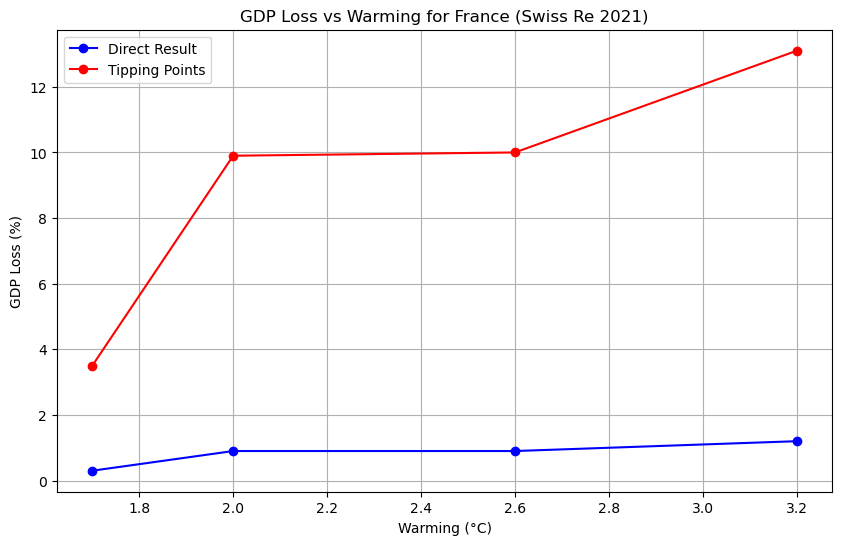

In [37]:
import matplotlib.pyplot as plt

# Filter the data for "Direct result" and "Tipping points"
direct_result = df_SwissRe2021[df_SwissRe2021['Comment'] == 'Direct Result']
tipping_points = df_SwissRe2021[df_SwissRe2021['Comment'] == 'Tipping points']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.plot(direct_result['Warming'], -direct_result['GDP Loss (%)'], color='blue', label='Direct Result', marker='o')
plt.plot(tipping_points['Warming'], -tipping_points['GDP Loss (%)'], color='red', label='Tipping Points', marker='o')

# Add labels and title
plt.xlabel('Warming (°C)')
plt.ylabel('GDP Loss (%)')
plt.title('GDP Loss vs Warming for France (Swiss Re 2021)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## COACCH 2021

In [38]:
data = [
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0", "Warming":2.1,"Country": "France", "Sector": "Energy Demand", "GDP Loss (%)": -0.20, "Comment": "High Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0","Warming":2.1, "Country": "France", "Sector": "Labour productivity", "GDP Loss (%)": -0.48, "Comment": "High Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021,"Year": 2050, 'Warming - Original': "RCP6.0","Warming":2.1, "Country": "France", "Sector": "Riverine floods", "GDP Loss (%)": -0.74, "Comment": "High Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0", "Warming":2.1,"Country": "France", "Sector": "Sea level rise", "GDP Loss (%)": -1.33, "Comment": "High Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0", "Warming":2.1,"Country": "France", "Sector": "Transport", "GDP Loss (%)": -0.095, "Comment": "High Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0", "Warming":2.1,"Country": "France", "Sector": "Fisheries", "GDP Loss (%)": +0.22, "Comment": "High Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0","Warming":2.1, "Country": "France", "Sector": "Agriculture", "GDP Loss (%)": +0.11, "Comment": "High Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0", "Warming":2.1,"Country": "France", "Sector": "All", "GDP Loss (%)": -2.62, "Comment": "High Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0", "Warming":2.1,"Country": "France", "Sector": "Energy Demand", "GDP Loss (%)": -0.18, "Comment": "Low Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0","Warming":2.1, "Country": "France", "Sector": "Labour productivity", "GDP Loss (%)": -0.42, "Comment": "Low Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0", "Warming":2.1,"Country": "France", "Sector": "Riverine floods", "GDP Loss (%)": -0.083, "Comment": "Low Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0","Warming":2.1, "Country": "France", "Sector": "Transport", "GDP Loss (%)": -0.092, "Comment": "Low Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0","Warming":2.1, "Country": "France", "Sector": "Sea level rise", "GDP Loss (%)": +0.155, "Comment": "Low Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0","Warming":2.1, "Country": "France", "Sector": "Fisheries", "GDP Loss (%)": +0.063, "Comment": "Low Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0","Warming":2.1, "Country": "France", "Sector": "Agriculture", "GDP Loss (%)": +0.10, "Comment": "Low Investment Mobility"},
  {"Authors": "COACCH","Paper year": 2021, "Year": 2050, 'Warming - Original': "RCP6.0","Warming":2.1, "Country": "France", "Sector": "All", "GDP Loss (%)": -0.46, "Comment": "Low Investment Mobility"}
]

df = pd.DataFrame(data)
df['Type'] = 'Grey literature'
df['Region'] = 'France'
df['Method']="Final impacts (bottom-up + sector interactions)"

df_COACCH2021 =df
df_COACCH2021


,Authors,Paper year,Year,Warming - Original,Warming,Country,Sector,GDP Loss (%),Comment,Type,Region,Method
0,COACCH,2021,2050,RCP6.0,2.1,France,Energy Demand,-0.200,High Investment Mobility,Grey literature,France,Final impacts (bottom-up + sector interactions)
1,COACCH,2021,2050,RCP6.0,2.1,France,Labour productivity,-0.480,High Investment Mobility,Grey literature,France,Final impacts (bottom-up + sector interactions)
2,COACCH,2021,2050,RCP6.0,2.1,France,Riverine floods,-0.740,High Investment Mobility,Grey literature,France,Final impacts (bottom-up + sector interactions)
3,COACCH,2021,2050,RCP6.0,2.1,France,Sea level rise,-1.330,High Investment Mobility,Grey literature,France,Final impacts (bottom-up + sector interactions)
4,COACCH,2021,2050,RCP6.0,2.1,France,Transport,-0.095,High Investment Mobility,Grey literature,France,Final impacts (bottom-up + sector interactions)
5,COACCH,2021,2050,RCP6.0,2.1,France,Fisheries,0.220,High Investment Mobility,Grey literature,France,Final impacts (bottom-up + sector interactions)
6,COACCH,2021,2050,RCP6.0,2.1,France,Agriculture,0.110,High Investment Mobility,Grey literature,France,Final impacts (bottom-up + sector interactions)
7,COACCH,2021,2050,RCP6.0,2.1,France,All,-2.620,High Investment Mobility,Grey literature,France,Final impacts (bottom-up + sector interactions)
8,COACCH,2021,2050,RCP6.0,2.1,France,Energy Demand,-0.180,Low Investment Mobility,Grey literature,France,Final impacts (bottom-up + sector interactions)
9,COACCH,2021,2050,RCP6.0,2.1,France,Labour productivity,-0.420,Low Investment Mobility,Grey literature,France,Final impacts (bottom-up + sector interactions)


## JRC 2020

In [39]:
data = [
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 1.5, "Country": "France", "Sector": "Energy", "GDP Loss (%)": +0.007, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 1.5, "Country": "France", "Sector": "Agriculture", "GDP Loss (%)": 0, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 1.5, "Country": "France", "Sector": "Droughts", "GDP Loss (%)": +0.015, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 1.5, "Country": "France", "Sector": "Rivers floods", "GDP Loss (%)": -0.082, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 1.5, "Country": "France", "Sector": "Coastal Floods", "GDP Loss (%)": -0.024, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 1.5, "Country": "France", "Sector": "All", "GDP Loss (%)": -0.084, "Comment": ""},

  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 2.0, "Country": "France", "Sector": "Energy", "GDP Loss (%)": +0.006, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 2.0, "Country": "France", "Sector": "Rivers floods", "GDP Loss (%)": -0.16, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 2.0, "Country": "France", "Sector": "Coastal Floods", "GDP Loss (%)": -0.04, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 2.0, "Country": "France", "Sector": "Agriculture", "GDP Loss (%)": -0.01, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 2.0, "Country": "France", "Sector": "Droughts", "GDP Loss (%)": -0.034, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 2.0, "Country": "France", "Sector": "All", "GDP Loss (%)": -0.238, "Comment": ""},

  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 3.0, "Country": "France", "Sector": "Rivers floods", "GDP Loss (%)": -0.26, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 3.0, "Country": "France", "Sector": "Coastal Floods", "GDP Loss (%)": -0.17, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 3.0, "Country": "France", "Sector": "Agriculture", "GDP Loss (%)": -0.09, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 3.0, "Country": "France", "Sector": "Droughts", "GDP Loss (%)": -0.11, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 3.0, "Country": "France", "Sector": "Energy", "GDP Loss (%)": -0.013, "Comment": ""},
  {"Authors": "JRC", "Paper year": 2020, "Year": 2050, 'Warming': 3.0, "Country": "France", "Sector": "All", "GDP Loss (%)": -0.64, "Comment": ""}
]

df = pd.DataFrame(data)
df['Type'] = 'Grey literature'
df['Region'] = 'Europe'
df['Method']="Final impacts (bottom-up + sector interactions)"

df_JRC2020 =df
df_JRC2020

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Comment,Type,Region,Method
0,JRC,2020,2050,1.5,France,Energy,0.007,,Grey literature,Europe,Final impacts (bottom-up + sector interactions)
1,JRC,2020,2050,1.5,France,Agriculture,0.000,,Grey literature,Europe,Final impacts (bottom-up + sector interactions)
2,JRC,2020,2050,1.5,France,Droughts,0.015,,Grey literature,Europe,Final impacts (bottom-up + sector interactions)
3,JRC,2020,2050,1.5,France,Rivers floods,-0.082,,Grey literature,Europe,Final impacts (bottom-up + sector interactions)
4,JRC,2020,2050,1.5,France,Coastal Floods,-0.024,,Grey literature,Europe,Final impacts (bottom-up + sector interactions)
5,JRC,2020,2050,1.5,France,All,-0.084,,Grey literature,Europe,Final impacts (bottom-up + sector interactions)
6,JRC,2020,2050,2.0,France,Energy,0.006,,Grey literature,Europe,Final impacts (bottom-up + sector interactions)
7,JRC,2020,2050,2.0,France,Rivers floods,-0.160,,Grey literature,Europe,Final impacts (bottom-up + sector interactions)
8,JRC,2020,2050,2.0,France,Coastal Floods,-0.040,,Grey literature,Europe,Final impacts (bottom-up + sector interactions)
9,JRC,2020,2050,2.0,France,Agriculture,-0.010,,Grey literature,Europe,Final impacts (bottom-up + sector interactions)


## Ademe 2023

In [40]:
import pandas as pd 

data = [
  {"Authors": "Ademe", "Paper year": 2023, "Year": 2050, 'Warming': 2.1, "Country": "France", "Sector": "Extreme events in the rest of the world", "GDP Loss (%)": -4.18, "Comment": ""},
  {"Authors": "Ademe", "Paper year": 2023, "Year": 2050, 'Warming': 2.1, "Country": "France", "Sector": "Agriculture", "GDP Loss (%)": -1.17, "Comment": ""},
  {"Authors": "Ademe", "Paper year": 2023, "Year": 2050, 'Warming': 2.1, "Country": "France", "Sector": "Extreme events France", "GDP Loss (%)": -0.40, "Comment": ""},
  {"Authors": "Ademe", "Paper year": 2023, "Year": 2050, 'Warming': 2.1, "Country": "France", "Sector": "SLR and floods", "GDP Loss (%)": -0.21, "Comment": ""},
  {"Authors": "Ademe", "Paper year": 2023, "Year": 2050, 'Warming': 2.1, "Country": "France", "Sector": "Other", "GDP Loss (%)": -0.36, "Comment": ""},
  {"Authors": "Ademe", "Paper year": 2023, "Year": 2050, 'Warming': 2.1, "Country": "France", "Sector": "All", "GDP Loss (%)": -6.32, "Comment": ""},

  {"Authors": "Ademe", "Paper year": 2023, "Year": 2100, 'Warming': 3.5, "Country": "France", "Sector": "Extreme events in the rest of the world", "GDP Loss (%)": -6.61, "Comment": ""},
  {"Authors": "Ademe", "Paper year": 2023, "Year": 2100, 'Warming': 3.5, "Country": "France", "Sector": "Agriculture", "GDP Loss (%)": -2.55, "Comment": ""},
  {"Authors": "Ademe", "Paper year": 2023, "Year": 2100, 'Warming': 3.5, "Country": "France", "Sector": "Extreme events France", "GDP Loss (%)": -0.47, "Comment": ""},
  {"Authors": "Ademe", "Paper year": 2023, "Year": 2100, 'Warming': 3.5, "Country": "France", "Sector": "SLR and floods", "GDP Loss (%)": -0.47, "Comment": ""},
  {"Authors": "Ademe", "Paper year": 2023, "Year": 2100, 'Warming': 3.5, "Country": "France", "Sector": "Other", "GDP Loss (%)": -0.60, "Comment": ""},
  {"Authors": "Ademe", "Paper year": 2023, "Year": 2100, 'Warming': 3.5, "Country": "France", "Sector": "All", "GDP Loss (%)": -10.70, "Comment": ""}
]

df = pd.DataFrame(data)
df['Type'] = 'Grey literature'
df['Region'] = 'France'
df['Method']="Final impacts (bottom-up + sector interactions)"

df_Ademe2023 =df
df_Ademe2023

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Comment,Type,Region,Method
0,Ademe,2023,2050,2.1,France,Extreme events in the rest of the world,-4.18,,Grey literature,France,Final impacts (bottom-up + sector interactions)
1,Ademe,2023,2050,2.1,France,Agriculture,-1.17,,Grey literature,France,Final impacts (bottom-up + sector interactions)
2,Ademe,2023,2050,2.1,France,Extreme events France,-0.40,,Grey literature,France,Final impacts (bottom-up + sector interactions)
3,Ademe,2023,2050,2.1,France,SLR and floods,-0.21,,Grey literature,France,Final impacts (bottom-up + sector interactions)
4,Ademe,2023,2050,2.1,France,Other,-0.36,,Grey literature,France,Final impacts (bottom-up + sector interactions)
5,Ademe,2023,2050,2.1,France,All,-6.32,,Grey literature,France,Final impacts (bottom-up + sector interactions)
6,Ademe,2023,2100,3.5,France,Extreme events in the rest of the world,-6.61,,Grey literature,France,Final impacts (bottom-up + sector interactions)
7,Ademe,2023,2100,3.5,France,Agriculture,-2.55,,Grey literature,France,Final impacts (bottom-up + sector interactions)
8,Ademe,2023,2100,3.5,France,Extreme events France,-0.47,,Grey literature,France,Final impacts (bottom-up + sector interactions)
9,Ademe,2023,2100,3.5,France,SLR and floods,-0.47,,Grey literature,France,Final impacts (bottom-up + sector interactions)


## NGFS 2024

Beware : only 50th percentile values for GDP change and meteorological change have been used. Only two NGFS scenarios have been explored : Net Zero 2050 and Current Policies.

For °C, temperature in 2100 are given in the technical document of NGFS Phase 5. Temperature in 2050 is inferred through IPCC temperature scenarios.

In [47]:
import pandas as pd 

file_path_GCAM = 'NGFS Phase V/Downscaled_GCAM 6.0 NGFS_data.xlsx'
df_ngfs_GCAM = pd.read_excel(file_path_GCAM)

file_path_REMIND = 'NGFS Phase V/Downscaled_REMIND-MAgPIE 3.3-4.8_data.xlsx'
df_ngfs_REMIND = pd.read_excel(file_path_REMIND)

file_path_MESSAGE = 'NGFS Phase V/Downscaled_MESSAGEix-GLOBIOM 2.0-M-R12-NGFS_data.xlsx'
df_ngfs_MESSAGE = pd.read_excel(file_path_MESSAGE)

In [48]:
gdp_only_gcam = df_ngfs_GCAM[df_ngfs_GCAM['Variable']=='Post-processed|GDP change|Kotz-Wenz 50th Percentile|GMT AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile']

gdp_only_gcam = gdp_only_gcam[gdp_only_gcam['Region'] == 'FRA'][['Model', 'Scenario', 'Region', 'Variable', 'Unit', '2050', '2100']]
gdp_only_gcam = gdp_only_gcam[gdp_only_gcam['Scenario'].isin(['Current Policies', 'Net Zero 2050'])]

gdp_only_remind = df_ngfs_REMIND[df_ngfs_REMIND['Variable']=='Post-processed|GDP change|Kotz-Wenz 50th Percentile|GMT AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile']
gdp_only_remind = gdp_only_remind[gdp_only_remind['Region'] == 'FRA'][['Model', 'Scenario', 'Region', 'Variable', 'Unit', '2050', '2100']]
gdp_only_remind = gdp_only_remind[gdp_only_remind['Scenario'].isin(['Current Policies', 'Net Zero 2050'])]

gdp_only_message= df_ngfs_MESSAGE[df_ngfs_MESSAGE['Variable']=='Post-processed|GDP change|Kotz-Wenz 50th Percentile|GMT AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile']
gdp_only_message = gdp_only_message[gdp_only_message['Region'] == 'FRA'][['Model', 'Scenario', 'Region', 'Variable', 'Unit', '2050', '2100']]
gdp_only_message = gdp_only_message[gdp_only_message['Scenario'].isin(['Current Policies', 'Net Zero 2050'])]

# Combine the data from the three DataFrames
combined_data = []

# Add data from gdp_only_gcam
for index, row in gdp_only_gcam.iterrows():
  combined_data.append({
    "Authors": "NGFS",
    "Paper year": 2024,
    "Year": 2050,
    "Warming - Original": row["Scenario"],
    "Country": "France",
    "Sector": "All",
    "GDP Loss (%)": row["2050"],
    "Comment": "GCAM"
  })
  combined_data.append({
    "Authors": "NGFS",
    "Paper year": 2024,
    "Year": 2100,
    "Warming - Original": row["Scenario"],
    "Country": "France",
    "Sector": "All",
    "GDP Loss (%)": row["2100"],
    "Comment": "GCAM"
  })

# Add data from gdp_only_message
for index, row in gdp_only_message.iterrows():
  combined_data.append({
    "Authors": "NGFS",
    "Paper year": 2024,
    "Year": 2050,
    "Warming - Original": row["Scenario"],
    "Country": "France",
    "Sector": "All",
    "GDP Loss (%)": row["2050"],
    "Comment": "MESSAGE"
  })
  combined_data.append({
    "Authors": "NGFS",
    "Paper year": 2024,
    "Year": 2100,
    "Warming - Original": row["Scenario"],
    "Country": "France",
    "Sector": "All",
    "GDP Loss (%)": row["2100"],
    "Comment": "MESSAGE"
  })

# Add data from gdp_only_remind
for index, row in gdp_only_remind.iterrows():
  combined_data.append({
    "Authors": "NGFS",
    "Paper year": 2024,
    "Year": 2050,
    "Warming - Original": row["Scenario"],
    "Country": "France",
    "Sector": "All",
    "GDP Loss (%)": row["2050"],
    "Comment": "REMIND"
  })
  combined_data.append({
    "Authors": "NGFS",
    "Paper year": 2024,
    "Year": 2100,
    "Warming - Original": row["Scenario"],
    "Country": "France",
    "Sector": "All",
    "GDP Loss (%)": row["2100"],
    "Comment": "REMIND"
  })

# Create a DataFrame from the combined data
df = pd.DataFrame(combined_data)
df['Type'] = 'NGFS'

# Add a new column 'Warming' with default values (e.g., None or NaN)
df['Warming'] = [2,3,1.7,1.4,2,3,1.7,1.4,2,3,1.7,1.4]
df['Region'] = 'France'
df['Method']="Final impacts (econometrics)"

# Display the DataFrame to let you choose the values
df_NGFS2024 = df
df_NGFS2024


,Authors,Paper year,Year,Warming - Original,Country,Sector,GDP Loss (%),Comment,Type,Warming,Region,Method
0,NGFS,2024,2050,Current Policies,France,All,-9.831597,GCAM,NGFS,2.0,France,Final impacts (econometrics)
1,NGFS,2024,2100,Current Policies,France,All,-22.569302,GCAM,NGFS,3.0,France,Final impacts (econometrics)
2,NGFS,2024,2050,Net Zero 2050,France,All,-6.205488,GCAM,NGFS,1.7,France,Final impacts (econometrics)
3,NGFS,2024,2100,Net Zero 2050,France,All,-2.451333,GCAM,NGFS,1.4,France,Final impacts (econometrics)
4,NGFS,2024,2050,Current Policies,France,All,-9.916409,MESSAGE,NGFS,2.0,France,Final impacts (econometrics)
5,NGFS,2024,2100,Current Policies,France,All,-21.029110,MESSAGE,NGFS,3.0,France,Final impacts (econometrics)
6,NGFS,2024,2050,Net Zero 2050,France,All,-6.673960,MESSAGE,NGFS,1.7,France,Final impacts (econometrics)
7,NGFS,2024,2100,Net Zero 2050,France,All,-3.320932,MESSAGE,NGFS,1.4,France,Final impacts (econometrics)
8,NGFS,2024,2050,Current Policies,France,All,-11.440130,REMIND,NGFS,2.0,France,Final impacts (econometrics)
9,NGFS,2024,2100,Current Policies,France,All,-23.943130,REMIND,NGFS,3.0,France,Final impacts (econometrics)


# All data combined

In [ ]:
import pandas as pd

# Assuming you have a list of DataFrames
dataframes = [
  df_Roson2016, df_Takakura2019, df_Bosello2012, df_Kompas2018, df_Dellink2019, 
  df_Burke2015, df_Pretis2018, df_Kalkuhl2020, df_Acevedo2021, df_Kahn2021, 
  df_Roson2012, df_Rose2017, df_Kotz2024, df_Neal2025,df_VanDerWijst2023,df_Waidelich2024,df_Mohaddes2024, df_Deloitte2021, df_Moodys2019, 
  df_SwissRe2021, df_COACCH2021, df_JRC2020, df_Ademe2023
]

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)
# Add a new column that concatenates "Authors" and "Paper year"

combined_df['Paper'] = combined_df['Authors'] + " " + combined_df['Paper year'].astype(str)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('literature_cost_climate_change_France.csv', index=False)
combined_df


,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method,Warming - Original,Comment,Paper
0,Roson and Satori,2016,2100,3.0,France,SLR,0.0000,Scientific paper,France,Direct impacts,NaN,NaN,Roson and Satori 2016
1,Roson and Satori,2016,2100,3.0,France,Agriculture,0.0002,Scientific paper,France,Direct impacts,NaN,NaN,Roson and Satori 2016
2,Roson and Satori,2016,2100,3.0,France,Heat,0.0000,Scientific paper,France,Direct impacts,NaN,NaN,Roson and Satori 2016
3,Roson and Satori,2016,2100,3.0,France,Health,-0.0501,Scientific paper,France,Direct impacts,NaN,NaN,Roson and Satori 2016
4,Roson and Satori,2016,2100,3.0,France,Tourism,0.3515,Scientific paper,France,Direct impacts,NaN,NaN,Roson and Satori 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Ademe,2023,2100,3.5,France,Agriculture,-2.5500,Grey literature,France,Final impacts (bottom-up + sector interactions),NaN,,Ademe 2023
196,Ademe,2023,2100,3.5,France,Extreme events France,-0.4700,Grey literature,France,Final impacts (bottom-up + sector interactions),NaN,,Ademe 2023
197,Ademe,2023,2100,3.5,France,SLR and floods,-0.4700,Grey literature,France,Final impacts (bottom-up + sector interactions),NaN,,Ademe 2023
198,Ademe,2023,2100,3.5,France,Other,-0.6000,Grey literature,France,Final impacts (bottom-up + sector interactions),NaN,,Ademe 2023


In [2]:
import pandas as pd
combined_df = pd.read_csv('literature_cost_climate_change_France.csv')
combined_df['GDP Loss (%)']=-combined_df['GDP Loss (%)']
all_sectors_df = combined_df[combined_df['Sector'] == 'All']

tipping_points_swiss_re = False
VanDerWijst2023_included= False
ademe_included = False

if tipping_points_swiss_re:
  all_sectors_df = combined_df[~((combined_df['Comment'] == 'Direct Result') & (combined_df['Authors'] == 'Swiss Re'))]
else:
  all_sectors_df = combined_df[~((combined_df['Comment'] == 'Tipping points') & (combined_df['Authors'] == 'Swiss Re'))]

if not(VanDerWijst2023_included):
  all_sectors_df = all_sectors_df[all_sectors_df['Authors'] != 'Van Der Wijst et al.']

if not(ademe_included):
  all_sectors_df = all_sectors_df[all_sectors_df['Authors'] != 'Ademe']

all_sectors_df = all_sectors_df[all_sectors_df['Sector'] == 'All']





## Fig. 1 GDP Loss vs Warming

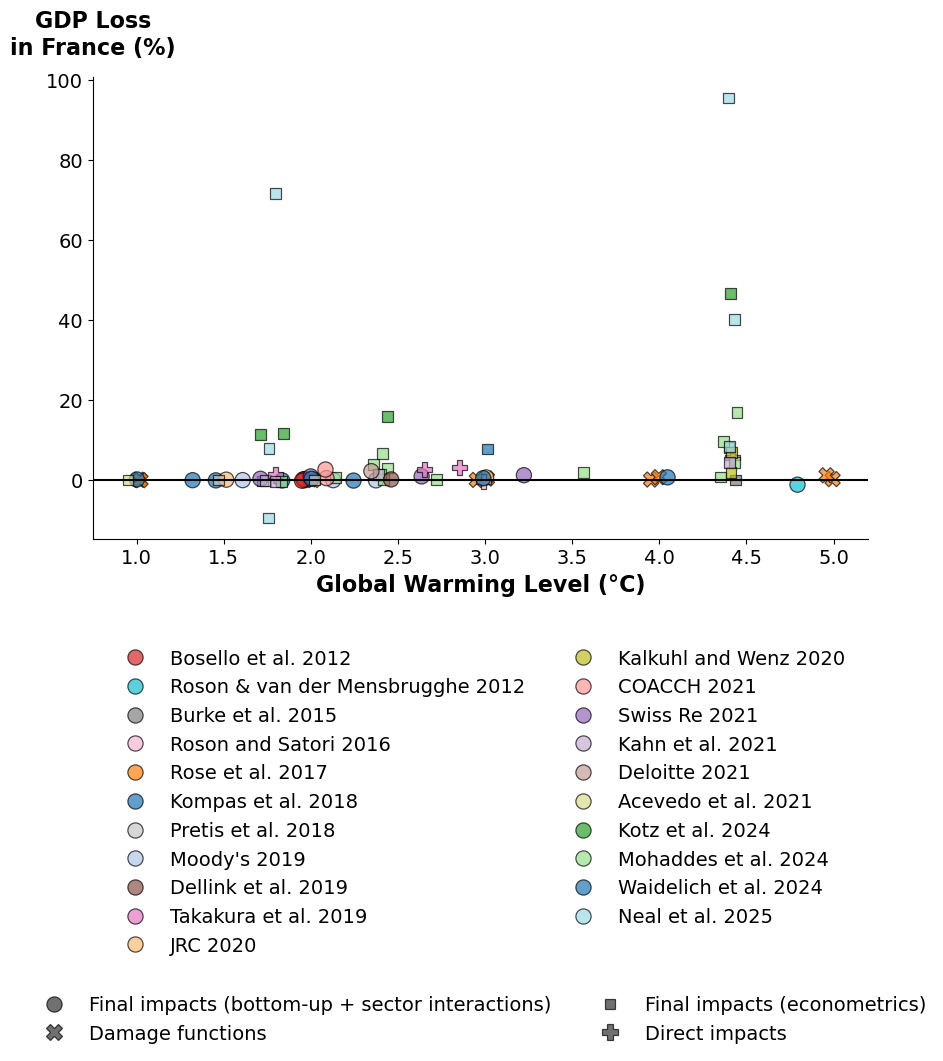

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the combined DataFrame for papers with Paper year > 2010
filtered_df = all_sectors_df

# Sort the DataFrame by 'Year'
filtered_df = filtered_df.sort_values(by='Year')

# Extract the year from the "Paper" column and create a new column "Year"
filtered_df['Year'] = filtered_df['Paper'].str[-4:].astype(int)
# Add jitter to 'Warming' to avoid overlapping points
filtered_df['Warming'] += np.random.uniform(-0.05, 0.05, size=len(filtered_df))
# Create a color scale for each paper
unique_papers = filtered_df['Paper'].unique()
color_palette = sns.color_palette("tab20", len(unique_papers))
color_dict = dict(zip(unique_papers, color_palette))

# Plot the filtered data
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
     data=filtered_df[filtered_df['Sector'] == 'All'], 
     x='Warming', 
     y='GDP Loss (%)', 
     hue='Paper', 
     edgecolor = 'black',
     alpha=0.7,
     style='Method',  # Different point styles for "Method"
     palette=color_dict,
     s=120
)

# Get the handles and labels from the plot
handles, labels = scatter_plot.get_legend_handles_labels()

# Create a dictionary to map labels to handles
label_handle_dict = dict(zip(labels, handles))

# Separate the labels into "Paper" and "Method" categories
paper_labels = [label for label in labels if label in unique_papers]
method_labels = [label for label in labels if label not in unique_papers and label not in ['Paper', 'Method']]

# Sort the paper labels by year
sorted_paper_labels = sorted(paper_labels, key=lambda x: int(x[-4:]))

# Combine the sorted paper labels with the method labels
sorted_labels = sorted_paper_labels + method_labels

# Create a sorted list of handles
sorted_handles = [label_handle_dict[label] for label in sorted_labels]

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1.5)
scatter_plot.spines['top'].set_visible(False)
scatter_plot.spines['right'].set_visible(False)
#scatter_plot.spines['left'].set_visible(False)
#scatter_plot.spines['bottom'].set_visible(False)

# Add a text above the figure
plt.text(0, 1.05, 'GDP Loss\nin France (%)', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.xlabel('Global Warming Level (°C)', fontsize=16, fontweight='bold')
plt.ylabel(None)
scatter_plot.tick_params(axis='both', which='major', labelsize=14)
scatter_plot.legend_.set_title(None)  # Remove the title of the legend
scatter_plot.legend_.set_bbox_to_anchor((1.05, 1))  # Adjust the legend position
scatter_plot.legend_.set_frame_on(False)  # Remove the bounding box around the legend
scatter_plot.legend_.set_title(None)  # Remove the title of the legend
# Adjust the legend to display in two columns
# Separate the handles and labels into "Paper" and "Method" categories
paper_handles = [label_handle_dict[label] for label in sorted_paper_labels]
method_handles = [label_handle_dict[label] for label in method_labels]

# Create the legend for "Paper"
paper_legend = plt.legend(paper_handles, sorted_paper_labels, bbox_to_anchor=(0.5, -0.2), fontsize=14, loc='upper center', frameon=False, ncol=2)
plt.gca().add_artist(paper_legend)  # Add the "Paper" legend back to the plot

# Add the legend for "Method" below the "Paper" legend
plt.legend(method_handles, method_labels, bbox_to_anchor=(0.5, -0.95), fontsize=14, loc='upper center', frameon=False, ncol=2)
scatter_plot.collections[0].set_sizes([120])  # Increase the size of the points

plt.grid(False)  # Suppress the grid under the graph
plt.show()

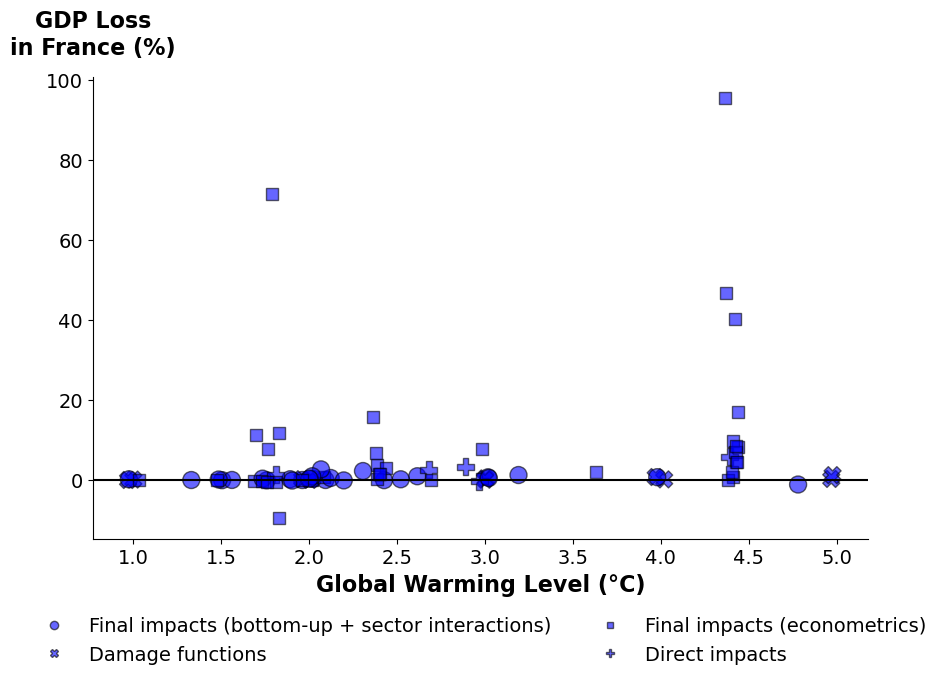

In [46]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Filter the combined DataFrame for papers with Paper year > 2010
filtered_df = all_sectors_df

# Sort the DataFrame by 'Year'
filtered_df = filtered_df.sort_values(by='Year')

# Extract the year from the "Paper" column and create a new column "Year"
filtered_df['Year'] = filtered_df['Paper'].str[-4:].astype(int)

# Create a color scale for each paper
unique_papers = filtered_df['Paper'].unique()
color_palette = sns.color_palette("tab20", len(unique_papers))
color_dict = dict(zip(unique_papers, color_palette))

# Add jitter to the x-axis (Warming) to avoid overlapping points

filtered_df['Warming'] = filtered_df['Warming'] + np.random.uniform(-0.04, 0.04, size=len(filtered_df))

# Plot the filtered data with jittered x-axis
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
     data=filtered_df[filtered_df['Sector'] == 'All'], 
     x='Warming', 
     y='GDP Loss (%)',
     style='Method',  # Different point styles for "Method"
     edgecolor='black',  # Solid border color for the points
     linewidth=1,  # Border thickness
     facecolor='blue',  # Transparent inside
     alpha=0.6  # Transparency for the inside
)

# Get the handles and labels from the plot
handles, labels = scatter_plot.get_legend_handles_labels()

# Create a dictionary to map labels to handles
label_handle_dict = dict(zip(labels, handles))

# Separate the labels into "Paper" and "Method" categories
paper_labels = [label for label in labels if label in unique_papers]
method_labels = [label for label in labels if label not in unique_papers and label not in ['Paper', 'Method']]

# Sort the paper labels by year
sorted_paper_labels = sorted(paper_labels, key=lambda x: int(x[-4:]))

# Combine the sorted paper labels with the method labels
sorted_labels = sorted_paper_labels + method_labels

# Create a sorted list of handles
sorted_handles = [label_handle_dict[label] for label in sorted_labels]

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1.5)
scatter_plot.spines['top'].set_visible(False)
scatter_plot.spines['right'].set_visible(False)
#scatter_plot.spines['left'].set_visible(False)
#scatter_plot.spines['bottom'].set_visible(False)

# Add a text above the figure
plt.text(0, 1.05, 'GDP Loss\nin France (%)', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.xlabel('Global Warming Level (°C)', fontsize=16, fontweight='bold')
plt.ylabel(None)
scatter_plot.tick_params(axis='both', which='major', labelsize=14)
scatter_plot.legend_.set_title(None)  # Remove the title of the legend
scatter_plot.legend_.set_bbox_to_anchor((1.05, 1))  # Adjust the legend position
scatter_plot.legend_.set_frame_on(False)  # Remove the bounding box around the legend
scatter_plot.legend_.set_title(None)  # Remove the title of the legend
# Adjust the legend to display in two columns
# Separate the handles and labels into "Paper" and "Method" categories
paper_handles = [label_handle_dict[label] for label in sorted_paper_labels]
method_handles = [label_handle_dict[label] for label in method_labels]

# Add the legend for "Method" below the "Paper" legend
plt.legend(method_handles, method_labels, bbox_to_anchor=(0.5, -0.13), fontsize=14, loc='upper center', frameon=False, ncol=2)
scatter_plot.collections[0].set_sizes([150])  # Increase the size of the points

plt.grid(False)  # Suppress the grid under the graph
plt.show()

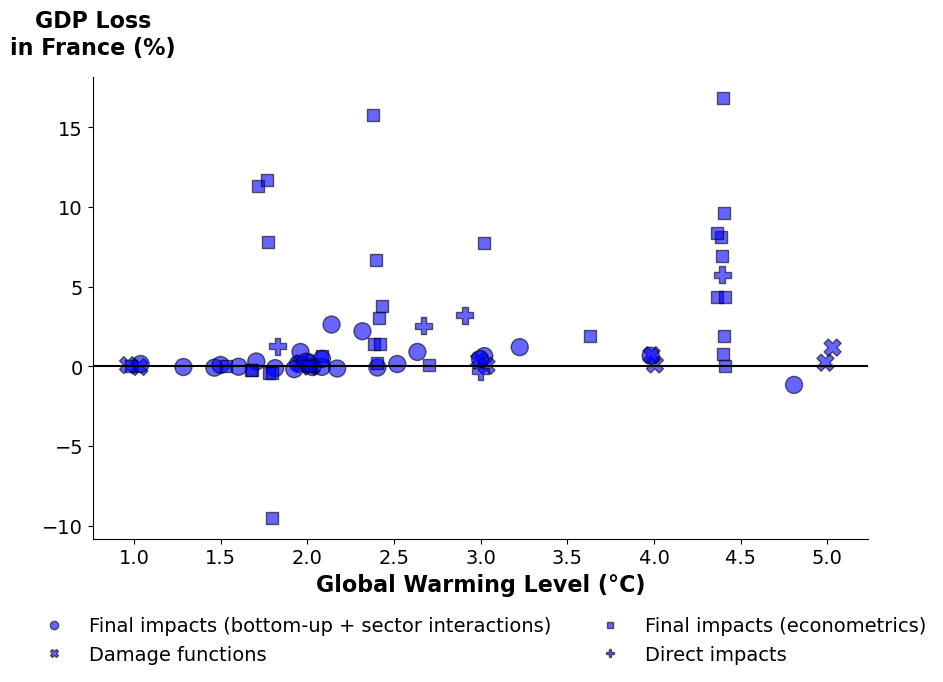

In [45]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Filter the combined DataFrame for papers with Paper year > 2010
filtered_df = all_sectors_df

# Sort the DataFrame by 'Year'
filtered_df = filtered_df.sort_values(by='Year')

# Extract the year from the "Paper" column and create a new column "Year"
filtered_df['Year'] = filtered_df['Paper'].str[-4:].astype(int)

# Create a color scale for each paper
unique_papers = filtered_df['Paper'].unique()
color_palette = sns.color_palette("tab20", len(unique_papers))
color_dict = dict(zip(unique_papers, color_palette))

# Add jitter to the x-axis (Warming) to avoid overlapping points

filtered_df = filtered_df[filtered_df['GDP Loss (%)'] < 20]
filtered_df['Warming'] = filtered_df['Warming'] + np.random.uniform(-0.04, 0.04, size=len(filtered_df))

# Plot the filtered data with jittered x-axis
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
     data=filtered_df[filtered_df['Sector'] == 'All'], 
     x='Warming', 
     y='GDP Loss (%)',
     style='Method',  # Different point styles for "Method"
     edgecolor='black',  # Solid border color for the points
     linewidth=1,  # Border thickness
     facecolor='blue',  # Transparent inside
     alpha=0.6  # Transparency for the inside
)

# Get the handles and labels from the plot
handles, labels = scatter_plot.get_legend_handles_labels()

# Create a dictionary to map labels to handles
label_handle_dict = dict(zip(labels, handles))

# Separate the labels into "Paper" and "Method" categories
paper_labels = [label for label in labels if label in unique_papers]
method_labels = [label for label in labels if label not in unique_papers and label not in ['Paper', 'Method']]

# Sort the paper labels by year
sorted_paper_labels = sorted(paper_labels, key=lambda x: int(x[-4:]))

# Combine the sorted paper labels with the method labels
sorted_labels = sorted_paper_labels + method_labels

# Create a sorted list of handles
sorted_handles = [label_handle_dict[label] for label in sorted_labels]

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1.5)
scatter_plot.spines['top'].set_visible(False)
scatter_plot.spines['right'].set_visible(False)
#scatter_plot.spines['left'].set_visible(False)
#scatter_plot.spines['bottom'].set_visible(False)

# Add a text above the figure
plt.text(0, 1.05, 'GDP Loss\nin France (%)', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.xlabel('Global Warming Level (°C)', fontsize=16, fontweight='bold')
plt.ylabel(None)
scatter_plot.tick_params(axis='both', which='major', labelsize=14)
scatter_plot.legend_.set_title(None)  # Remove the title of the legend
scatter_plot.legend_.set_bbox_to_anchor((1.05, 1))  # Adjust the legend position
scatter_plot.legend_.set_frame_on(False)  # Remove the bounding box around the legend
scatter_plot.legend_.set_title(None)  # Remove the title of the legend
# Adjust the legend to display in two columns
# Separate the handles and labels into "Paper" and "Method" categories
paper_handles = [label_handle_dict[label] for label in sorted_paper_labels]
method_handles = [label_handle_dict[label] for label in method_labels]

# Add the legend for "Method" below the "Paper" legend
plt.legend(method_handles, method_labels, bbox_to_anchor=(0.5, -0.13), fontsize=14, loc='upper center', frameon=False, ncol=2)
scatter_plot.collections[0].set_sizes([150])  # Increase the size of the points

plt.grid(False)  # Suppress the grid under the graph
plt.show()

## Fig. 3 GDP Loss by Range

One point by assessment

Temperature Range: ~ 2°C
Q1: -0.06
Q2: 0.18
Q3: 1.61
-------------------------
Temperature Range: ~ 3°C
Q1: 0.12
Q2: 0.55
Q3: 1.53
-------------------------
Temperature Range: ~ 4°C
Q1: 1.04
Q2: 5.04
Q3: 9.29
-------------------------


C:\Users\delah\AppData\Local\Temp\ipykernel_27400\3626030966.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_5_2_4['Temperature Range'] = '~ 2°C'
C:\Users\delah\AppData\Local\Temp\ipykernel_27400\3626030966.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_5_3_4['Temperature Range'] = '~ 3°C'
C:\Users\delah\AppData\Local\Temp\ipykernel_27400\3626030966.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

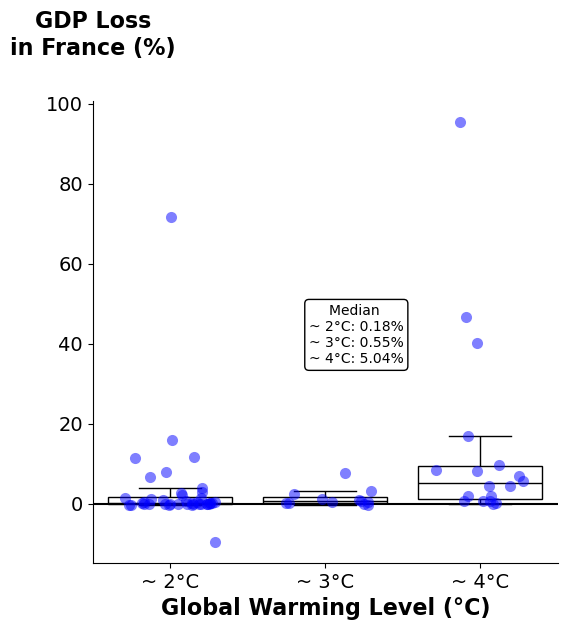

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for the specified temperature ranges
# Calculate the mean GDP Loss for each paper
mean_gdp_loss_df = all_sectors_df.groupby(['Paper', 'Warming']).agg({'GDP Loss (%)': 'mean'}).reset_index()

# Filter the DataFrame for the specified temperature ranges
df_1_5_2_4 = all_sectors_df[(all_sectors_df['Warming'] >= 1.5) & (all_sectors_df['Warming'] < 2.5)]
df_2_5_3_4 = all_sectors_df[(all_sectors_df['Warming'] >= 2.5) & (all_sectors_df['Warming'] < 3.5)]
df_3_5_4_4 = all_sectors_df[(all_sectors_df['Warming'] >= 3.5) & (all_sectors_df['Warming'] < 4.5)]


# Add a column to indicate the temperature range
df_1_5_2_4['Temperature Range'] = '~ 2°C'
df_2_5_3_4['Temperature Range'] = '~ 3°C'
df_3_5_4_4['Temperature Range'] = '~ 4°C'

# Combine the DataFrames
combined_df = pd.concat([df_1_5_2_4, df_2_5_3_4, df_3_5_4_4])

# Create the box plots
plt.figure(figsize=(6, 6))
sns.boxplot(x='Temperature Range', y='GDP Loss (%)', data=combined_df, showfliers=False, linewidth=1, color='white', boxprops=dict(edgecolor='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), medianprops=dict(color='black'))
sns.stripplot(x='Temperature Range', y='GDP Loss (%)', data=combined_df, color='blue', jitter=0.3, alpha=0.5, size=8)

# Add a single box with Q2 (median) values for all temperature ranges
median_text = "\n".join([f"{temp_range}: {combined_df[combined_df['Temperature Range'] == temp_range]['GDP Loss (%)'].median():.2f}%" 
             for temp_range in combined_df['Temperature Range'].unique()])
median_text = 'Median \n'+ median_text

plt.text(x=1.2, y=50, 
     s=median_text, 
     ha='center', va='top', fontsize=10, color='black', 
     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


# Calculate and display Q1, Q2, and Q3 for each temperature range
for temp_range in combined_df['Temperature Range'].unique():
  temp_df = combined_df[combined_df['Temperature Range'] == temp_range]
  q1 = temp_df['GDP Loss (%)'].quantile(0.25)
  q2 = temp_df['GDP Loss (%)'].median()
  q3 = temp_df['GDP Loss (%)'].quantile(0.75)
  
  print(f'Temperature Range: {temp_range}')
  print(f'Q1: {q1:.2f}')
  print(f'Q2: {q2:.2f}')
  print(f'Q3: {q3:.2f}')
  print('-------------------------')

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)

# Add a text above the figure
plt.text(0, 1.1, 'GDP Loss\nin France (%)', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.xlabel('Global Warming Level (°C)', fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
# Adjust the legend to display in two columns
plt.grid(False)  # Suppress the grid under the graph
plt.show()

Figure 2 : One point by study

Temperature Range: ~ 2°C
Q1: -0.07
Q2: 0.07
Q3: 1.33
-------------------------
Temperature Range: ~ 3°C
Q1: 0.17
Q2: 0.64
Q3: 1.86
-------------------------
Temperature Range: ~ 4°C
Q1: 0.97
Q2: 4.38
Q3: 7.39
-------------------------


C:\Users\delah\AppData\Local\Temp\ipykernel_27400\3488980587.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_5_2_4['Temperature Range'] = '~ 2°C'
C:\Users\delah\AppData\Local\Temp\ipykernel_27400\3488980587.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_5_3_4['Temperature Range'] = '~ 3°C'
C:\Users\delah\AppData\Local\Temp\ipykernel_27400\3488980587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

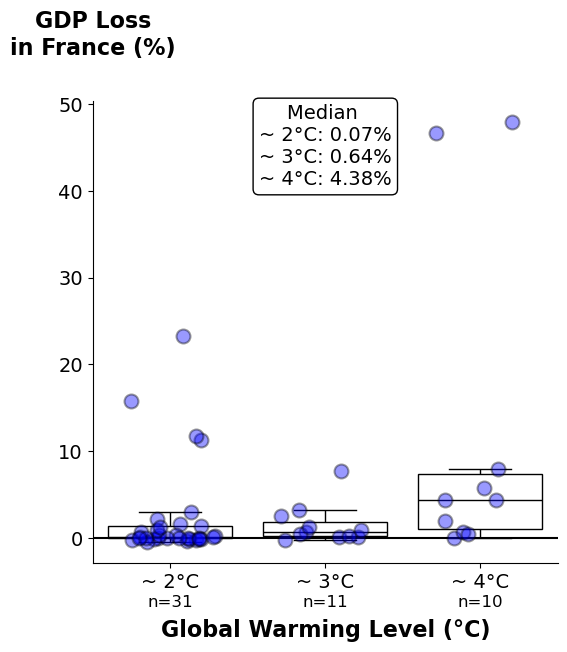

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for the specified temperature ranges
# Calculate the mean GDP Loss for each paper
mean_gdp_loss_df = all_sectors_df.groupby(['Paper', 'Warming']).agg({'GDP Loss (%)': 'mean'}).reset_index()

# Filter the DataFrame for the specified temperature ranges
df_1_5_2_4 = mean_gdp_loss_df[(mean_gdp_loss_df['Warming'] >= 1.5) & (mean_gdp_loss_df['Warming'] < 2.5)]
df_2_5_3_4 = mean_gdp_loss_df[(mean_gdp_loss_df['Warming'] >= 2.5) & (mean_gdp_loss_df['Warming'] < 3.5)]
df_3_5_4_4 = mean_gdp_loss_df[(mean_gdp_loss_df['Warming'] >= 3.5) & (mean_gdp_loss_df['Warming'] < 4.5)]

# Add a column to indicate the temperature range
df_1_5_2_4['Temperature Range'] = '~ 2°C'
df_2_5_3_4['Temperature Range'] = '~ 3°C'
df_3_5_4_4['Temperature Range'] = '~ 4°C'

# Combine the DataFrames
combined_df = pd.concat([df_1_5_2_4, df_2_5_3_4, df_3_5_4_4])

# Create the box plots
plt.figure(figsize=(6, 6))
sns.boxplot(
     x='Temperature Range', 
     y='GDP Loss (%)', 
     data=combined_df, 
     showfliers=False, 
     linewidth=1, 
     color='white', 
     boxprops=dict(edgecolor='black'), 
     whiskerprops=dict(color='black'), 
     capprops=dict(color='black'), 
     medianprops=dict(color='black')
)
sns.stripplot(
     x='Temperature Range', 
     y='GDP Loss (%)', 
     data=combined_df, 
     color='blue', 
     jitter=0.3, 
     alpha=0.4, 
     size=10, 
     edgecolor='black', 
     linewidth=1.5
)

# Add a single box with Q2 (median) values for all temperature ranges
median_text = "\n".join([f"{temp_range}: {combined_df[combined_df['Temperature Range'] == temp_range]['GDP Loss (%)'].median():.2f}%" 
             for temp_range in combined_df['Temperature Range'].unique()])
median_text = 'Median \n'+ median_text

plt.text(x=1, y=50, 
     s=median_text, 
     ha='center', va='top', fontsize=14, color='black', 
     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


# Calculate and display Q1, Q2, and Q3 for each temperature range
for temp_range in combined_df['Temperature Range'].unique():
  temp_df = combined_df[combined_df['Temperature Range'] == temp_range]
  q1 = temp_df['GDP Loss (%)'].quantile(0.25)
  q2 = temp_df['GDP Loss (%)'].median()
  q3 = temp_df['GDP Loss (%)'].quantile(0.75)
  
  print(f'Temperature Range: {temp_range}')
  print(f'Q1: {q1:.2f}')
  print(f'Q2: {q2:.2f}')
  print(f'Q3: {q3:.2f}')
  print('-------------------------')

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)

# Add a text above the figure
plt.text(0, 1.1, 'GDP Loss\nin France (%)', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.xlabel('Global Warming Level (°C)', fontsize=16, fontweight='bold')
plt.ylabel(None)

# Add the number of points under the x ticks
for temp_range in combined_df['Temperature Range'].unique():
     count = combined_df[combined_df['Temperature Range'] == temp_range].shape[0]
     plt.text(
          x=list(combined_df['Temperature Range'].unique()).index(temp_range), 
          y=-6.5, 
          s=f"n={count}", 
          ha='center', 
          va='top', 
          fontsize=12, 
          color='black'
     )

# Move the x-axis label below the tick labels
plt.xlabel('Global Warming Level (°C)', fontsize=16, fontweight='bold', labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# Adjust the legend to display in two columns
plt.grid(False)  # Suppress the grid under the graph
plt.show()

In [242]:
combined_df['Temperature Range'].unique()

array(['~ 2°C', '~ 3°C', '~ 4°C'], dtype=object)

## Fig. 4 Distribution at 2°C

C:\Users\delah\AppData\Local\Temp\ipykernel_27400\178742666.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_5_2_4['Temperature Range'] = '~ 2°C'


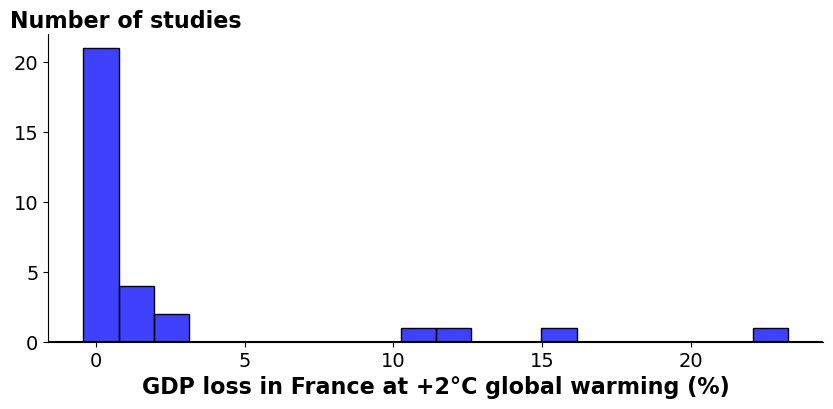

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the specified temperature range
mean_gdp_loss_df = all_sectors_df.groupby(['Paper', 'Warming']).agg({'GDP Loss (%)': 'mean'}).reset_index()
df_1_5_2_4 = mean_gdp_loss_df[(mean_gdp_loss_df['Warming'] >= 1.5) & (mean_gdp_loss_df['Warming'] <= 2.4)]

#df_1_5_2_4 = all_sectors_df[(all_sectors_df['Warming'] >= 1.5) & (all_sectors_df['Warming'] <= 2.4)]

# Add a column to indicate the temperature range
df_1_5_2_4['Temperature Range'] = '~ 2°C'

# Create the distribution plot
plt.figure(figsize=(10, 4))
sns.histplot(df_1_5_2_4['GDP Loss (%)'], kde=False, bins=20, color='blue')

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)

# Add a text above the figure
plt.text(0.1, 1.02, 'Number of studies', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.xlabel('GDP loss in France at +2°C global warming (%)', fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.yticks(ticks=range(0, 25, 5))    # Set y-axis ticks from 0 to 25 with a step of 5
plt.grid(False)  # Suppress the grid under the graph
plt.show()


In [18]:
df_1_5_2_4

,Paper,Warming,GDP Loss (%),Temperature Range
1,Bosello et al. 2012,1.92,-0.015000,~ 2°C
3,COACCH 2021,2.10,1.540000,~ 2°C
5,Deloitte 2021,2.30,2.200000,~ 2°C
6,JRC 2020,1.50,0.084000,~ 2°C
7,JRC 2020,2.00,0.238000,~ 2°C
9,Kahn et al. 2021,1.70,-0.220000,~ 2°C
10,Kahn et al. 2021,1.80,-0.420000,~ 2°C
11,Kahn et al. 2021,2.40,1.410000,~ 2°C
16,Kompas et al. 2018,1.50,-0.088000,~ 2°C
17,Kompas et al. 2018,1.80,-0.117000,~ 2°C


## Fig. 2 GDP Loss by Publication Year

C:\Users\delah\AppData\Local\Temp\ipykernel_27400\3579223314.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


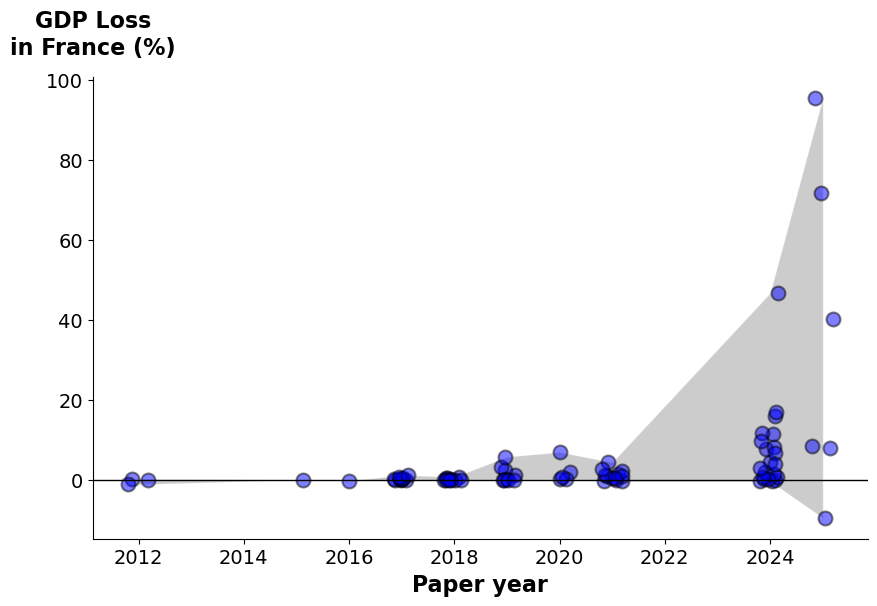

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the combined DataFrame for papers with Paper year <= 2024
filtered_df = all_sectors_df[all_sectors_df['Paper year'] <= 2025]

# Group by 'Paper year' and calculate the min and max GDP Loss for each year
grouped_df = filtered_df.groupby('Paper year')['GDP Loss (%)'].agg(['min', 'max']).reset_index()
filtered_df['Paper year'] = filtered_df['Paper year'] + np.random.uniform(-0.2, 0.2, size=len(filtered_df))
# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.fill_between(grouped_df['Paper year'], grouped_df['min'], grouped_df['max'], color='black', alpha=0.2,edgecolor='white')
plt.scatter(
     filtered_df['Paper year'], 
     filtered_df['GDP Loss (%)'], 
     color='blue', 
     edgecolor='black', 
     alpha=0.5, 
     s=100, 
     linewidth=1.5
)
plt.xlabel('Paper year')
plt.legend(frameon=False)

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a text above the figure
plt.text(0, 1.05, 'GDP Loss\nin France (%)', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.xlabel('Paper year', fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
# Adjust the legend to display in two columns
plt.grid(False)  # Suppress the grid under the graph
plt.show()

C:\Users\delah\AppData\Local\Temp\ipykernel_27400\1701459193.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


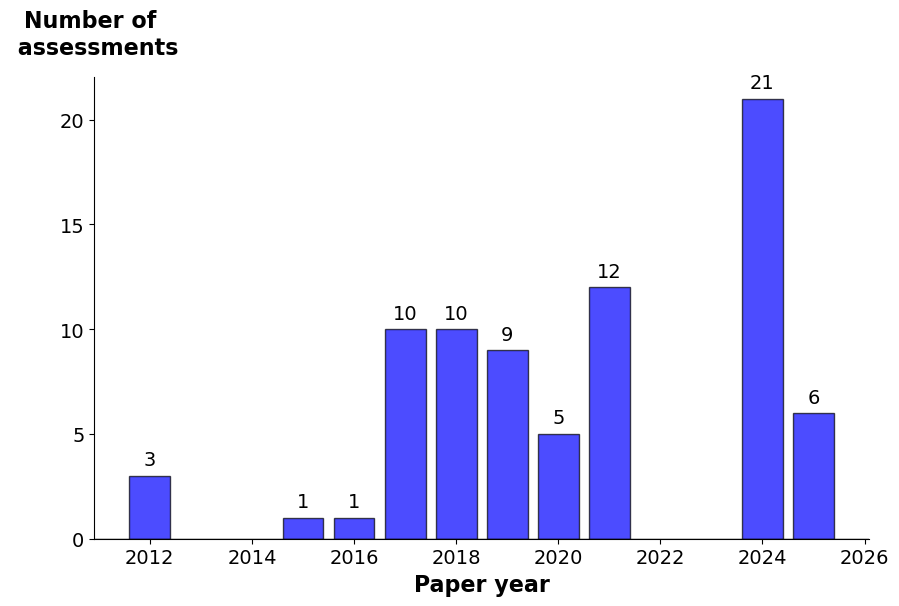

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the combined DataFrame for papers with Paper year <= 2024
filtered_df = all_sectors_df[all_sectors_df['Paper year'] <= 2025]

# Group by 'Paper year' and calculate the min and max GDP Loss for each year
grouped_df = filtered_df.groupby('Paper year')['GDP Loss (%)'].agg(['min', 'max']).reset_index()

# Plot the filtered data
plt.figure(figsize=(10, 6))
# Count the number of values for each paper year
value_counts = filtered_df['Paper year'].value_counts().sort_index()

# Plot the number of values for each paper year
plt.bar(value_counts.index, value_counts.values, color='blue', alpha=0.7, edgecolor='black')

# Add labels to the bars
for i, count in enumerate(value_counts.values):
  plt.text(value_counts.index[i], count + 0.5, str(count), ha='center', fontsize=14)

plt.xlabel('Paper year', fontsize=16, fontweight='bold')
plt.legend(frameon=False)

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a text above the figure
plt.text(0, 1.05, 'Number of \n assessments', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.yticks(ticks=range(0, 21, 5), fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
# Adjust the legend to display in two columns
plt.grid(False)  # Suppress the grid under the graph
plt.show()

In [13]:
# Filter the DataFrame for papers published in 2025
papers_2025 = all_sectors_df[all_sectors_df['Paper year'] > 2018]

# Find the lowest and highest GDP loss
lowest_gdp_loss = papers_2025['GDP Loss (%)'].min()
highest_gdp_loss = papers_2025['GDP Loss (%)'].max()

# Print the results
print(f"Lowest GDP Loss in 2025: {lowest_gdp_loss}%")
print(f"Highest GDP Loss in 2025: {highest_gdp_loss}%")

Lowest GDP Loss in 2025: -9.524133384332591%
Highest GDP Loss in 2025: 95.4609108778424%


In [11]:
# Filter the DataFrame for papers published in 2025
papers_2025 = all_sectors_df[all_sectors_df['Paper year'] <= 2018]

# Find the lowest and highest GDP loss
lowest_gdp_loss = papers_2025['GDP Loss (%)'].min()
highest_gdp_loss = papers_2025['GDP Loss (%)'].max()

# Print the results
print(f"Lowest GDP Loss in 2025: {lowest_gdp_loss}%")
print(f"Highest GDP Loss in 2025: {highest_gdp_loss}%")

Lowest GDP Loss in 2025: -1.17%
Highest GDP Loss in 2025: 1.174%


In [173]:
filtered_df

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method,Warming - Original,Comment,Paper
5,Roson and Satori,2016,2100,3.0,France,All,-0.300000,Scientific paper,France,Direct impacts,NaN,NaN,Roson and Satori 2016
43,Takakura et al.,2019,2099,2.7,Europe,All,2.529443,Scientific paper,Europe,Direct impacts,RCP4.5,NaN,Takakura et al. 2019
44,Takakura et al.,2019,2099,2.9,Europe,All,3.219154,Scientific paper,Europe,Direct impacts,RCP6.0,NaN,Takakura et al. 2019
64,Kompas et al.,2018,2100,3.0,France,All,0.455000,Scientific paper,France,Final impacts (bottom-up + sector interactions),NaN,NaN,Kompas et al. 2018
94,Rose et al.,2017,2050,3.0,Western Europe,All,0.029000,Scientific paper,Europe,Damage functions,NaN,FUND,Rose et al. 2017
99,Rose et al.,2017,2050,3.0,EU,All,0.357000,Scientific paper,Europe,Damage functions,NaN,PAGE,Rose et al. 2017
114,Waidelich et al.,2024,2100,3.0,France,All,7.755844,Scientific paper,France,Final impacts (econometrics),NaN,NaN,Waidelich et al. 2024
118,Mohaddes et al.,2024,2100,2.7,France,All,0.076043,Scientific paper,France,Final impacts (econometrics),%Loss_SSP2-4.5,Standard,Mohaddes et al. 2024
148,Swiss Re,2021,2050,2.6,France,All,0.900000,Grey literature,France,Final impacts (bottom-up + sector interactions),2.6°C,Direct Result,Swiss Re 2021
149,Swiss Re,2021,2050,3.2,France,All,1.200000,Grey literature,France,Final impacts (bottom-up + sector interactions),3.2°C,Direct Result,Swiss Re 2021


In [66]:
filtered_df[filtered_df['Paper year']==2024]

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method,Warming - Original,Comment,Paper
104,Waidelich et al.,2024,2100,3.0,France,All,7.755844,Scientific paper,France,Final impacts (econometrics),NaN,NaN,Waidelich et al. 2024
108,Mohaddes et al.,2024,2100,2.7,France,All,0.076043,Scientific paper,France,Final impacts (econometrics),%Loss_SSP2-4.5,Standard,Mohaddes et al. 2024
191,NGFS,2024,2100,3.0,France,All,22.569302,NGFS,France,Final impacts (econometrics),Current Policies,GCAM,NGFS 2024
195,NGFS,2024,2100,3.0,France,All,21.029110,NGFS,France,Final impacts (econometrics),Current Policies,MESSAGE,NGFS 2024
199,NGFS,2024,2100,3.0,France,All,23.943130,NGFS,France,Final impacts (econometrics),Current Policies,REMIND,NGFS 2024


## Papers > 5%

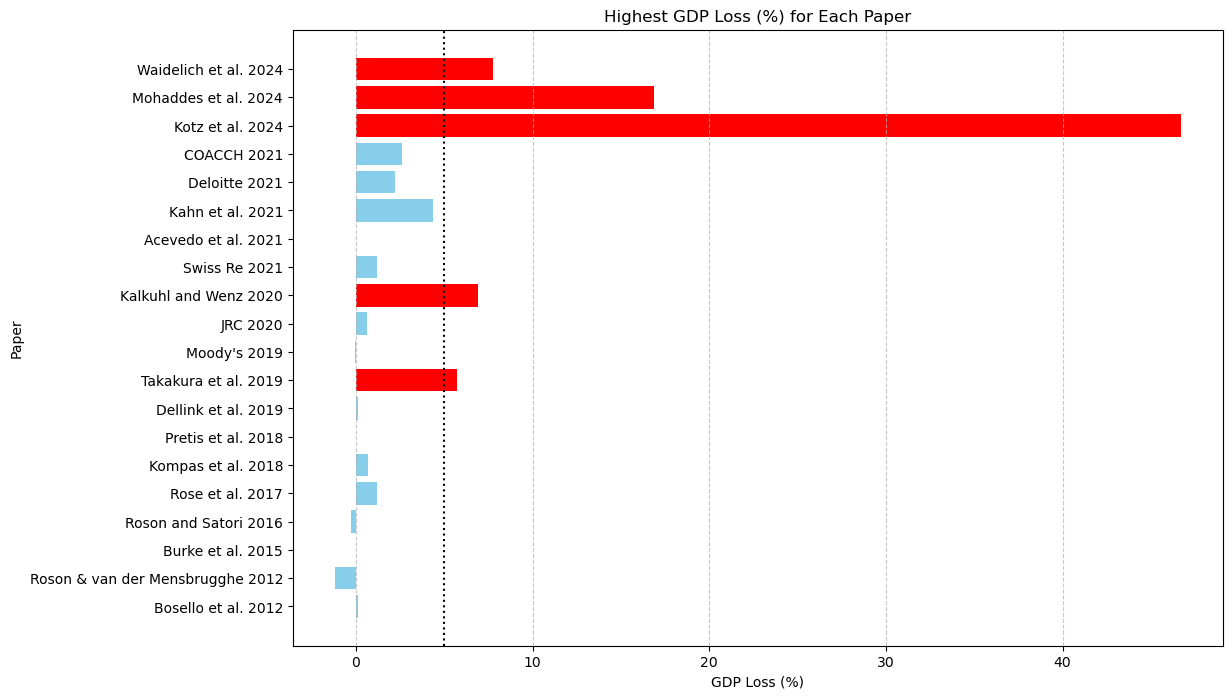

In [53]:
import matplotlib.pyplot as plt

# Group by 'Paper' and get the highest value of 'GDP Loss (%)' for each group
max_gdp_loss_df = all_sectors_df.groupby('Paper')['GDP Loss (%)'].max().reset_index()

# Merge with the original DataFrame to get the 'Paper year'
max_gdp_loss_df = max_gdp_loss_df.merge(all_sectors_df[['Paper', 'Paper year']].drop_duplicates(), on='Paper')

# Sort the DataFrame by 'Paper year' in ascending order for better visualization
max_gdp_loss_df = max_gdp_loss_df.sort_values(by='Paper year', ascending=True)

# Plot the data
plt.figure(figsize=(12, 8))
colors = ['red' if value > 5 else 'skyblue' for value in max_gdp_loss_df['GDP Loss (%)']]
plt.barh(max_gdp_loss_df['Paper'], max_gdp_loss_df['GDP Loss (%)'], color=colors)
plt.axvline(x=5, color='black', linestyle='dotted')
plt.xlabel('GDP Loss (%)')
plt.ylabel('Paper')
plt.title('Highest GDP Loss (%) for Each Paper')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

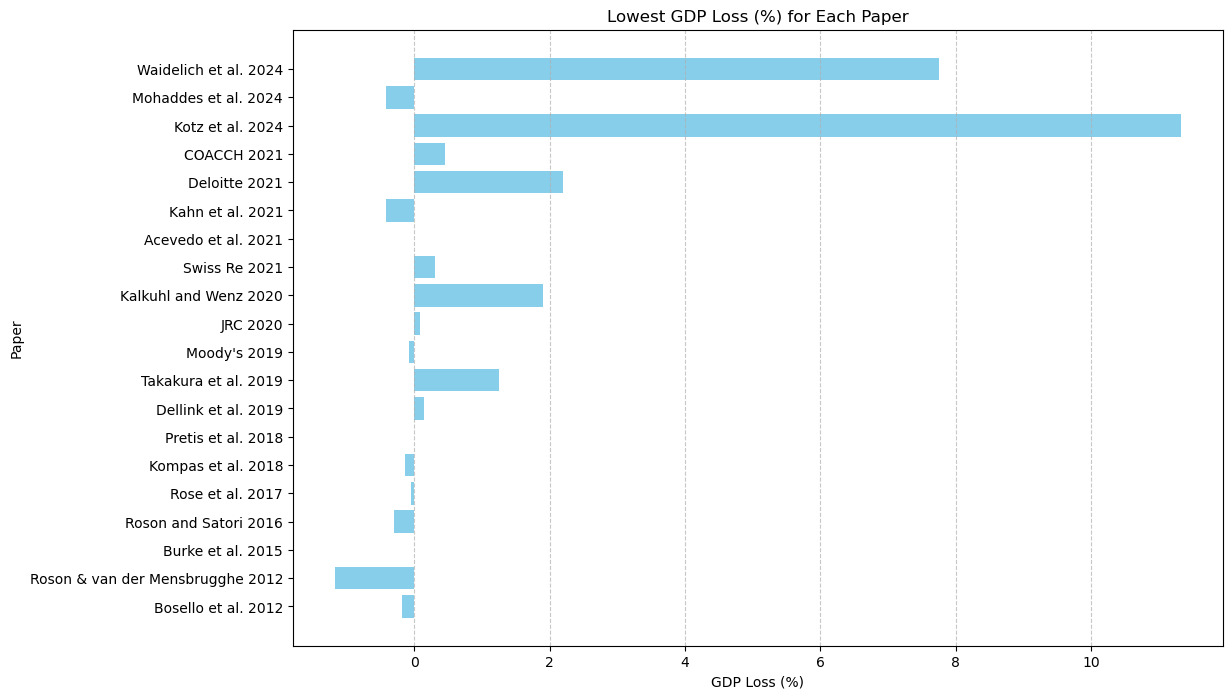

In [54]:
import matplotlib.pyplot as plt

# Group by 'Paper' and get the highest value of 'GDP Loss (%)' for each group
max_gdp_loss_df = all_sectors_df.groupby('Paper')['GDP Loss (%)'].min().reset_index()

# Merge with the original DataFrame to get the 'Paper year'
max_gdp_loss_df = max_gdp_loss_df.merge(all_sectors_df[['Paper', 'Paper year']].drop_duplicates(), on='Paper')

# Sort the DataFrame by 'Paper year' in ascending order for better visualization
max_gdp_loss_df = max_gdp_loss_df.sort_values(by='Paper year', ascending=True)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(max_gdp_loss_df['Paper'], max_gdp_loss_df['GDP Loss (%)'], color='skyblue')
plt.xlabel('GDP Loss (%)')
plt.ylabel('Paper')
plt.title('Lowest GDP Loss (%) for Each Paper')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

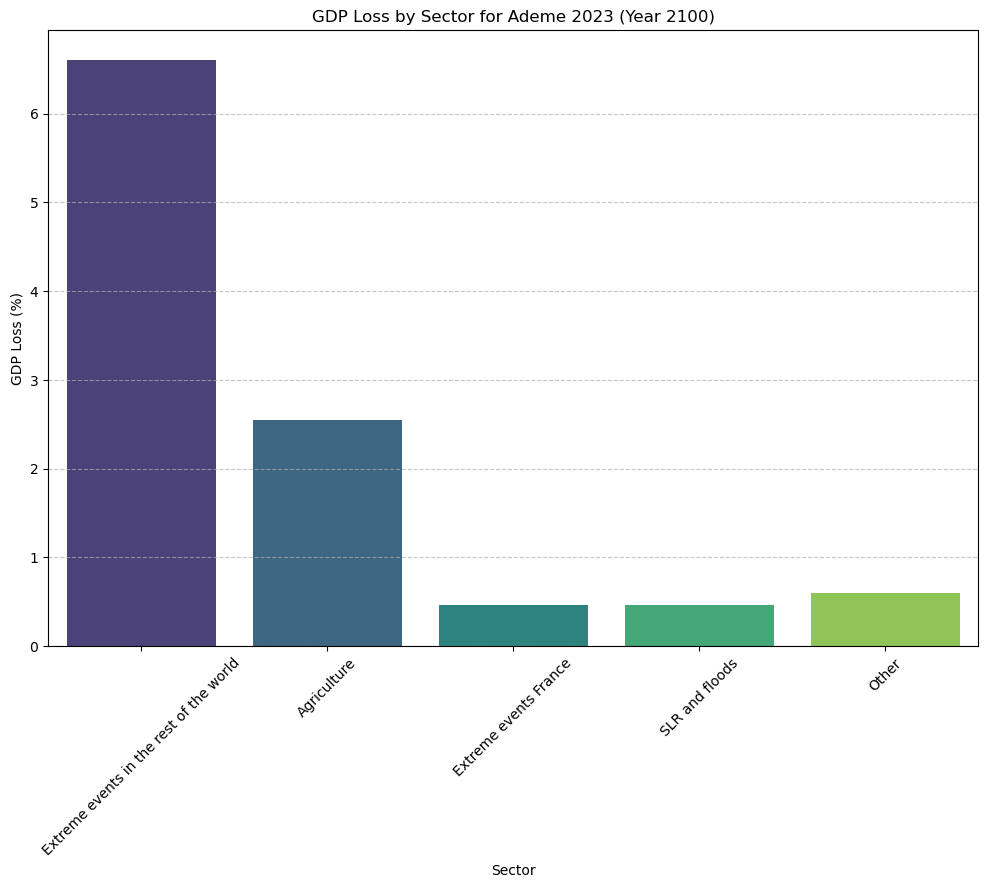

In [169]:
import seaborn as sns

combined_df
focused_papers = combined_df[combined_df['Authors'].isin(['Ademe'])]
focused_papers=focused_papers[focused_papers['Year']==2100]
focused_papers
import matplotlib.pyplot as plt

# Filter the DataFrame for sectors different from 'All'
sectors_df = focused_papers[focused_papers['Sector'] != 'All']

# Plot the data
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=sectors_df, x='Sector', y='GDP Loss (%)', hue='Sector', dodge=False, palette='viridis')

# Add labels and title
plt.xlabel('Sector')
plt.ylabel('GDP Loss (%)')
plt.title('GDP Loss by Sector for Ademe 2023 (Year 2100)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [163]:
combined_df

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method,Warming - Original,Comment,Paper,Temperature Range
42,Takakura et al.,2019,2099,1.80,Europe,All,1.257140,Scientific paper,Europe,Direct impacts,RCP2.6,NaN,Takakura et al. 2019,~ 2°C
46,Bosello et al.,2012,2050,1.92,MEUR,All,0.150000,Scientific paper,Europe,Final impacts (bottom-up + sector interactions),NaN,NaN,Bosello et al. 2012,~ 2°C
54,Bosello et al.,2012,2050,1.92,NEUR,All,-0.180000,Scientific paper,Europe,Final impacts (bottom-up + sector interactions),NaN,NaN,Bosello et al. 2012,~ 2°C
63,Kompas et al.,2018,2100,2.00,France,All,0.285000,Scientific paper,France,Final impacts (bottom-up + sector interactions),NaN,NaN,Kompas et al. 2018,~ 2°C
67,Kompas et al.,2018,2037,1.50,France,All,-0.088000,Scientific paper,France,Final impacts (bottom-up + sector interactions),NaN,NaN,Kompas et al. 2018,~ 2°C
68,Kompas et al.,2018,2047,1.80,France,All,-0.117000,Scientific paper,France,Final impacts (bottom-up + sector interactions),NaN,NaN,Kompas et al. 2018,~ 2°C
69,Kompas et al.,2018,2067,2.20,France,All,-0.141000,Scientific paper,France,Final impacts (bottom-up + sector interactions),NaN,NaN,Kompas et al. 2018,~ 2°C
76,Pretis et al.,2018,2100,1.50,France,All,-0.000000,Scientific paper,France,Final impacts (econometrics),NaN,NaN,Pretis et al. 2018,~ 2°C
77,Pretis et al.,2018,2100,2.00,France,All,-0.000000,Scientific paper,France,Final impacts (econometrics),NaN,NaN,Pretis et al. 2018,~ 2°C
81,Kahn et al.,2021,2100,1.80,France,All,-1.000000,Scientific paper,France,Final impacts (econometrics),RCP2.6,Max,Kahn et al. 2021,~ 2°C


In [168]:
combined_df

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method,Warming - Original,Comment,Paper
0,Roson and Satori,2016,2100,3.0,France,SLR,-0.000000,Scientific paper,France,Direct impacts,NaN,NaN,Roson and Satori 2016
1,Roson and Satori,2016,2100,3.0,France,Agriculture,-0.000200,Scientific paper,France,Direct impacts,NaN,NaN,Roson and Satori 2016
2,Roson and Satori,2016,2100,3.0,France,Heat,-0.000000,Scientific paper,France,Direct impacts,NaN,NaN,Roson and Satori 2016
3,Roson and Satori,2016,2100,3.0,France,Health,0.050100,Scientific paper,France,Direct impacts,NaN,NaN,Roson and Satori 2016
4,Roson and Satori,2016,2100,3.0,France,Tourism,-0.351500,Scientific paper,France,Direct impacts,NaN,NaN,Roson and Satori 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,NGFS,2024,2100,1.4,France,All,3.320932,NGFS,France,Final impacts (econometrics),Net Zero 2050,MESSAGE,NGFS 2024
181,NGFS,2024,2050,2.0,France,All,11.440130,NGFS,France,Final impacts (econometrics),Current Policies,REMIND,NGFS 2024
182,NGFS,2024,2100,3.0,France,All,23.943130,NGFS,France,Final impacts (econometrics),Current Policies,REMIND,NGFS 2024
183,NGFS,2024,2050,1.7,France,All,5.357068,NGFS,France,Final impacts (econometrics),Net Zero 2050,REMIND,NGFS 2024


In [171]:
focused_papers

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method,Warming - Original,Comment,Paper
6,Takakura et al.,2019,2099,1.8,Europe,Agricultural productivity,-0.037592,Scientific paper,Europe,Direct impacts,RCP2.6,NaN,Takakura et al. 2019
7,Takakura et al.,2019,2099,1.8,Europe,Coastal innundation,0.009730,Scientific paper,Europe,Direct impacts,RCP2.6,NaN,Takakura et al. 2019
8,Takakura et al.,2019,2099,1.8,Europe,Cooling/heating demand,0.961322,Scientific paper,Europe,Direct impacts,RCP2.6,NaN,Takakura et al. 2019
9,Takakura et al.,2019,2099,1.8,Europe,Fluvial flood,0.001499,Scientific paper,Europe,Direct impacts,RCP2.6,NaN,Takakura et al. 2019
10,Takakura et al.,2019,2099,1.8,Europe,Heat-related excess mortality,0.303732,Scientific paper,Europe,Direct impacts,RCP2.6,NaN,Takakura et al. 2019
11,Takakura et al.,2019,2099,1.8,Europe,Hydropower generation,0.000449,Scientific paper,Europe,Direct impacts,RCP2.6,NaN,Takakura et al. 2019
12,Takakura et al.,2019,2099,1.8,Europe,Occupational-health cost,-0.103756,Scientific paper,Europe,Direct impacts,RCP2.6,NaN,Takakura et al. 2019
13,Takakura et al.,2019,2099,1.8,Europe,Thermalpower generation,0.057133,Scientific paper,Europe,Direct impacts,RCP2.6,NaN,Takakura et al. 2019
14,Takakura et al.,2019,2099,1.8,Europe,Undernourishment,0.064624,Scientific paper,Europe,Direct impacts,RCP2.6,NaN,Takakura et al. 2019
15,Takakura et al.,2019,2099,2.7,Europe,Agricultural productivity,0.001604,Scientific paper,Europe,Direct impacts,RCP4.5,NaN,Takakura et al. 2019


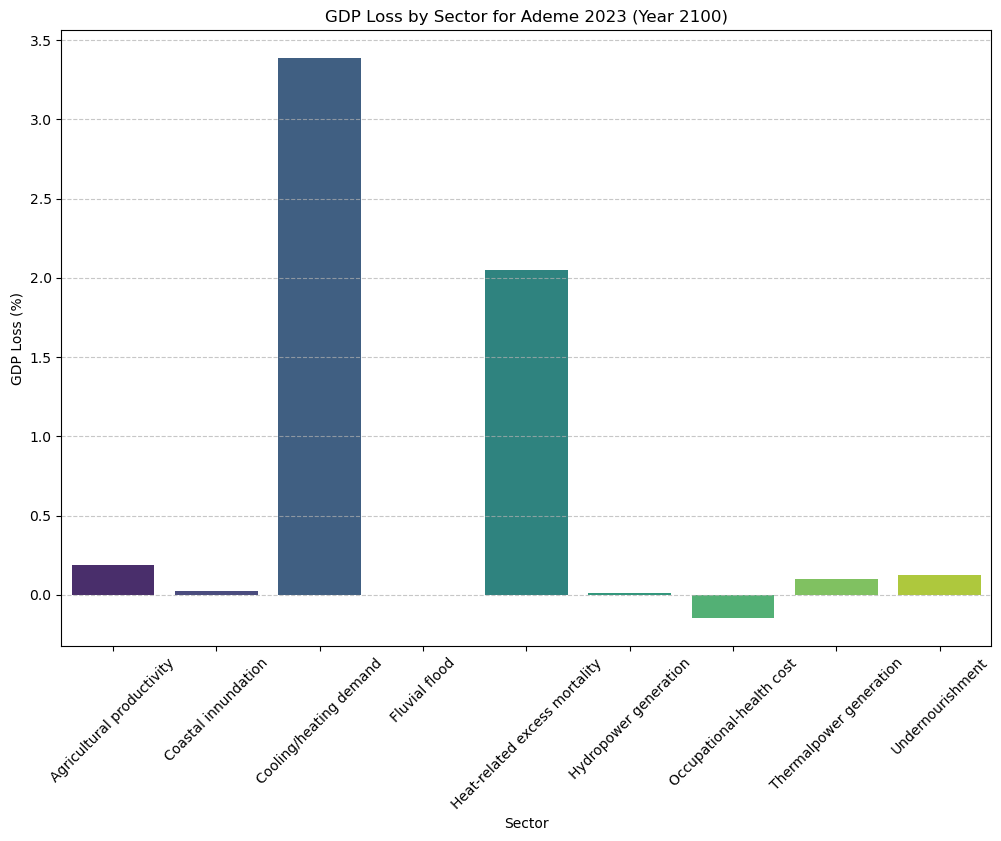

In [172]:
import seaborn as sns

combined_df
focused_papers = combined_df[combined_df['Authors'].isin(['Takakura et al.'])]
focused_papers=focused_papers[focused_papers['Warming']==4.4]
focused_papers
import matplotlib.pyplot as plt

# Filter the DataFrame for sectors different from 'All'
sectors_df = focused_papers[focused_papers['Sector'] != 'All']

# Plot the data
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=sectors_df, x='Sector', y='GDP Loss (%)', hue='Sector', dodge=False, palette='viridis')

# Add labels and title
plt.xlabel('Sector')
plt.ylabel('GDP Loss (%)')
plt.title('GDP Loss by Sector for Ademe 2023 (Year 2100)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [173]:
focused_papers

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method,Warming - Original,Comment,Paper
33,Takakura et al.,2019,2099,4.4,Europe,Agricultural productivity,0.184914,Scientific paper,Europe,Direct impacts,RCP8.5,NaN,Takakura et al. 2019
34,Takakura et al.,2019,2099,4.4,Europe,Coastal innundation,0.023796,Scientific paper,Europe,Direct impacts,RCP8.5,NaN,Takakura et al. 2019
35,Takakura et al.,2019,2099,4.4,Europe,Cooling/heating demand,3.385523,Scientific paper,Europe,Direct impacts,RCP8.5,NaN,Takakura et al. 2019
36,Takakura et al.,2019,2099,4.4,Europe,Fluvial flood,-0.001793,Scientific paper,Europe,Direct impacts,RCP8.5,NaN,Takakura et al. 2019
37,Takakura et al.,2019,2099,4.4,Europe,Heat-related excess mortality,2.046005,Scientific paper,Europe,Direct impacts,RCP8.5,NaN,Takakura et al. 2019
38,Takakura et al.,2019,2099,4.4,Europe,Hydropower generation,0.012478,Scientific paper,Europe,Direct impacts,RCP8.5,NaN,Takakura et al. 2019
39,Takakura et al.,2019,2099,4.4,Europe,Occupational-health cost,-0.147436,Scientific paper,Europe,Direct impacts,RCP8.5,NaN,Takakura et al. 2019
40,Takakura et al.,2019,2099,4.4,Europe,Thermalpower generation,0.101570,Scientific paper,Europe,Direct impacts,RCP8.5,NaN,Takakura et al. 2019
41,Takakura et al.,2019,2099,4.4,Europe,Undernourishment,0.127152,Scientific paper,Europe,Direct impacts,RCP8.5,NaN,Takakura et al. 2019
45,Takakura et al.,2019,2099,4.4,Europe,All,5.732208,Scientific paper,Europe,Direct impacts,RCP8.5,NaN,Takakura et al. 2019


## Discussion and conclusion

In [3]:
# Filter the DataFrame for the specified temperature ranges
df_1_5_2_4 = all_sectors_df[(all_sectors_df['Warming'] >= 1.5) & (all_sectors_df['Warming'] < 2.5)]
df_2_5_3_4 = all_sectors_df[(all_sectors_df['Warming'] >= 2.5) & (all_sectors_df['Warming'] < 3.5)]
df_3_5_4_4 = all_sectors_df[(all_sectors_df['Warming'] >= 3.5) & (all_sectors_df['Warming'] < 4.5)]

df_1_5_2_4

,Authors,Paper year,Year,Warming,Country,Sector,GDP Loss (%),Type,Region,Method,Warming - Original,Comment,Paper
42,Takakura et al.,2019,2099,1.80,Europe,All,1.257140,Scientific paper,Europe,Direct impacts,RCP2.6,NaN,Takakura et al. 2019
46,Bosello et al.,2012,2050,1.92,MEUR,All,0.150000,Scientific paper,Europe,Final impacts (bottom-up + sector interactions),NaN,NaN,Bosello et al. 2012
54,Bosello et al.,2012,2050,1.92,NEUR,All,-0.180000,Scientific paper,Europe,Final impacts (bottom-up + sector interactions),NaN,NaN,Bosello et al. 2012
63,Kompas et al.,2018,2100,2.00,France,All,0.285000,Scientific paper,France,Final impacts (bottom-up + sector interactions),NaN,NaN,Kompas et al. 2018
67,Kompas et al.,2018,2037,1.50,France,All,-0.088000,Scientific paper,France,Final impacts (bottom-up + sector interactions),NaN,NaN,Kompas et al. 2018
68,Kompas et al.,2018,2047,1.80,France,All,-0.117000,Scientific paper,France,Final impacts (bottom-up + sector interactions),NaN,NaN,Kompas et al. 2018
69,Kompas et al.,2018,2067,2.20,France,All,-0.141000,Scientific paper,France,Final impacts (bottom-up + sector interactions),NaN,NaN,Kompas et al. 2018
76,Pretis et al.,2018,2100,1.50,France,All,-0.000000,Scientific paper,France,Final impacts (econometrics),NaN,NaN,Pretis et al. 2018
77,Pretis et al.,2018,2100,2.00,France,All,-0.000000,Scientific paper,France,Final impacts (econometrics),NaN,NaN,Pretis et al. 2018
81,Kahn et al.,2021,2050,1.70,France,All,-0.220000,Scientific paper,France,Final impacts (econometrics),RCP2.6,NaN,Kahn et al. 2021


## SM B Fig 1

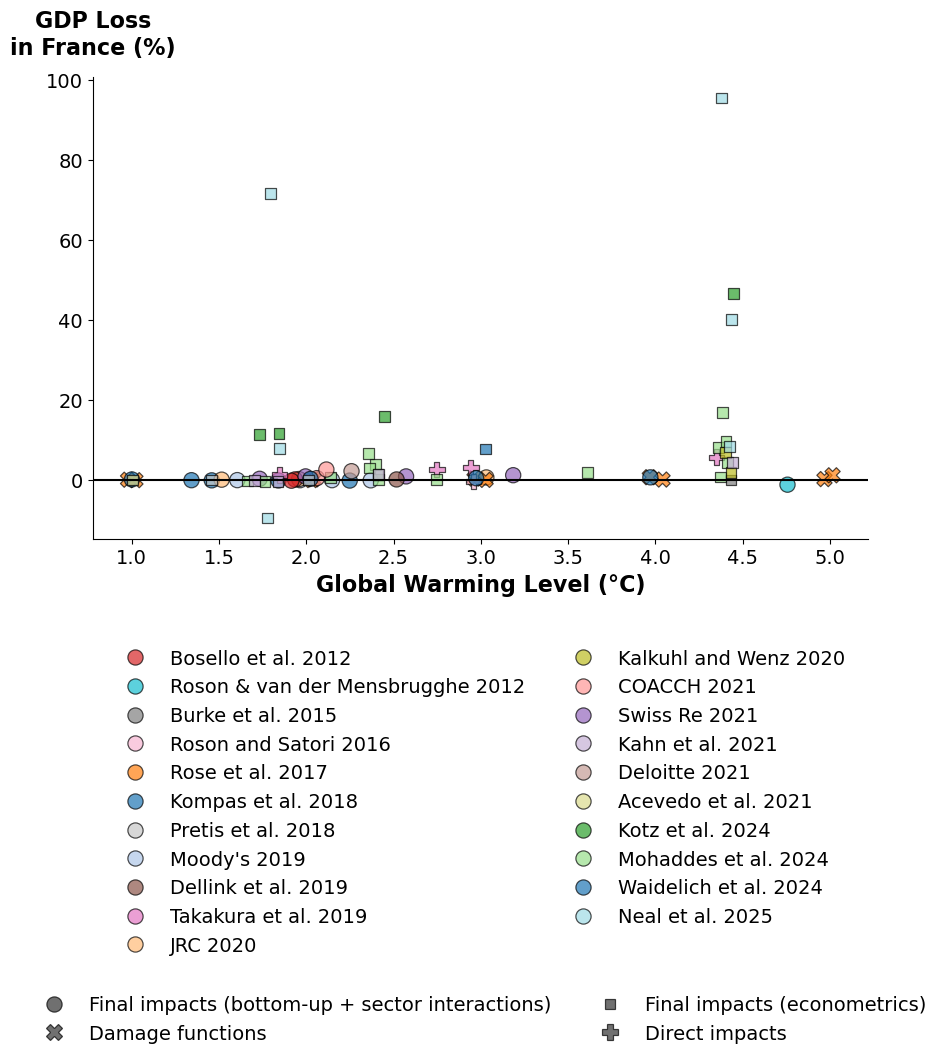

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the combined DataFrame for papers with Paper year > 2010
filtered_df = all_sectors_df

# Sort the DataFrame by 'Year'
filtered_df = filtered_df.sort_values(by='Year')

# Extract the year from the "Paper" column and create a new column "Year"
filtered_df['Year'] = filtered_df['Paper'].str[-4:].astype(int)
# Add jitter to 'Warming' to avoid overlapping points
filtered_df['Warming'] += np.random.uniform(-0.05, 0.05, size=len(filtered_df))
# Create a color scale for each paper
unique_papers = filtered_df['Paper'].unique()
color_palette = sns.color_palette("tab20", len(unique_papers))
color_dict = dict(zip(unique_papers, color_palette))

# Plot the filtered data
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
     data=filtered_df[filtered_df['Sector'] == 'All'], 
     x='Warming', 
     y='GDP Loss (%)', 
     hue='Paper', 
     edgecolor = 'black',
     alpha=0.7,
     style='Method',  # Different point styles for "Method"
     palette=color_dict,
     s=120
)

# Get the handles and labels from the plot
handles, labels = scatter_plot.get_legend_handles_labels()

# Create a dictionary to map labels to handles
label_handle_dict = dict(zip(labels, handles))

# Separate the labels into "Paper" and "Method" categories
paper_labels = [label for label in labels if label in unique_papers]
method_labels = [label for label in labels if label not in unique_papers and label not in ['Paper', 'Method']]

# Sort the paper labels by year
sorted_paper_labels = sorted(paper_labels, key=lambda x: int(x[-4:]))

# Combine the sorted paper labels with the method labels
sorted_labels = sorted_paper_labels + method_labels

# Create a sorted list of handles
sorted_handles = [label_handle_dict[label] for label in sorted_labels]

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1.5)
scatter_plot.spines['top'].set_visible(False)
scatter_plot.spines['right'].set_visible(False)
#scatter_plot.spines['left'].set_visible(False)
#scatter_plot.spines['bottom'].set_visible(False)

# Add a text above the figure
plt.text(0, 1.05, 'GDP Loss\nin France (%)', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.xlabel('Global Warming Level (°C)', fontsize=16, fontweight='bold')
plt.ylabel(None)
scatter_plot.tick_params(axis='both', which='major', labelsize=14)
scatter_plot.legend_.set_title(None)  # Remove the title of the legend
scatter_plot.legend_.set_bbox_to_anchor((1.05, 1))  # Adjust the legend position
scatter_plot.legend_.set_frame_on(False)  # Remove the bounding box around the legend
scatter_plot.legend_.set_title(None)  # Remove the title of the legend
# Adjust the legend to display in two columns
# Separate the handles and labels into "Paper" and "Method" categories
paper_handles = [label_handle_dict[label] for label in sorted_paper_labels]
method_handles = [label_handle_dict[label] for label in method_labels]

# Create the legend for "Paper"
paper_legend = plt.legend(paper_handles, sorted_paper_labels, bbox_to_anchor=(0.5, -0.2), fontsize=14, loc='upper center', frameon=False, ncol=2)
plt.gca().add_artist(paper_legend)  # Add the "Paper" legend back to the plot

# Add the legend for "Method" below the "Paper" legend
plt.legend(method_handles, method_labels, bbox_to_anchor=(0.5, -0.95), fontsize=14, loc='upper center', frameon=False, ncol=2)
scatter_plot.collections[0].set_sizes([120])  # Increase the size of the points

plt.grid(False)  # Suppress the grid under the graph
plt.show()

## SM B Fig 2

Panel (a) ~ 2°C

C:\Users\delah\AppData\Local\Temp\ipykernel_27400\1517728596.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


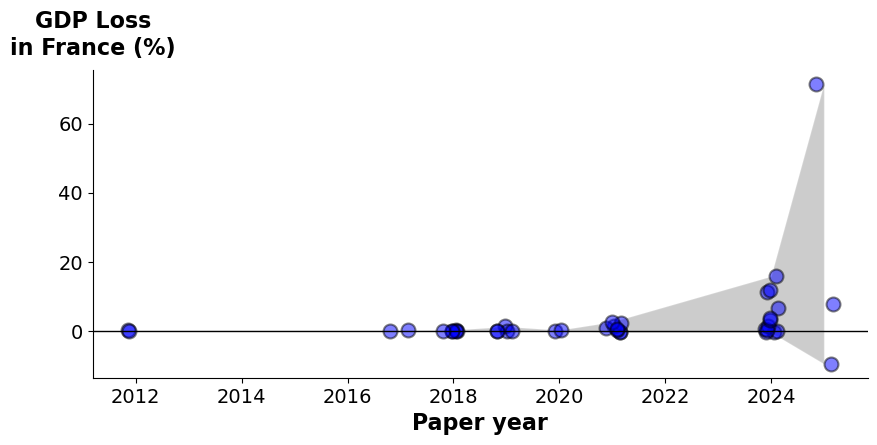

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the combined DataFrame for papers with Paper year <= 2024
filtered_df = all_sectors_df[all_sectors_df['Paper year'] <= 2025]
filtered_df = filtered_df[(filtered_df['Warming'] >= 1.5) & (filtered_df['Warming'] <= 2.4)]

# Group by 'Paper year' and calculate the min and max GDP Loss for each year
grouped_df = filtered_df.groupby('Paper year')['GDP Loss (%)'].agg(['min', 'max']).reset_index()
filtered_df['Paper year'] = filtered_df['Paper year'] + np.random.uniform(-0.2, 0.2, size=len(filtered_df))
# Plot the filtered data
plt.figure(figsize=(10, 4))
plt.fill_between(grouped_df['Paper year'], grouped_df['min'], grouped_df['max'], color='black', alpha=0.2,edgecolor='white')
plt.scatter(
     filtered_df['Paper year'], 
     filtered_df['GDP Loss (%)'], 
     color='blue', 
     edgecolor='black', 
     alpha=0.5, 
     s=100, 
     linewidth=1.5
)
plt.xlabel('Paper year')
plt.legend(frameon=False)

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a text above the figure
plt.text(0, 1.05, 'GDP Loss\nin France (%)', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.xlabel('Paper year', fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
# Adjust the legend to display in two columns
plt.grid(False)  # Suppress the grid under the graph
plt.show()

Panel (b) ~ 3°C

C:\Users\delah\AppData\Local\Temp\ipykernel_27400\3512078449.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


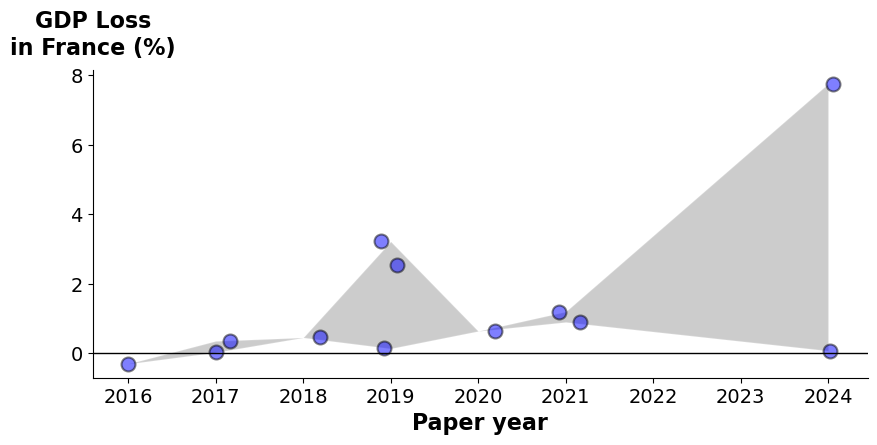

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the combined DataFrame for papers with Paper year <= 2024
filtered_df = all_sectors_df[all_sectors_df['Paper year'] <= 2025]
filtered_df = filtered_df[(filtered_df['Warming'] >= 2.5) & (filtered_df['Warming'] <= 3.4)]

# Group by 'Paper year' and calculate the min and max GDP Loss for each year
grouped_df = filtered_df.groupby('Paper year')['GDP Loss (%)'].agg(['min', 'max']).reset_index()
filtered_df['Paper year'] = filtered_df['Paper year'] + np.random.uniform(-0.2, 0.2, size=len(filtered_df))
# Plot the filtered data
plt.figure(figsize=(10, 4))
plt.fill_between(grouped_df['Paper year'], grouped_df['min'], grouped_df['max'], color='black', alpha=0.2,edgecolor='white')
plt.scatter(
     filtered_df['Paper year'], 
     filtered_df['GDP Loss (%)'], 
     color='blue', 
     edgecolor='black', 
     alpha=0.5, 
     s=100, 
     linewidth=1.5
)
plt.xlabel('Paper year')
plt.legend(frameon=False)

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a text above the figure
plt.text(0, 1.05, 'GDP Loss\nin France (%)', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.xlabel('Paper year', fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
# Adjust the legend to display in two columns
plt.grid(False)  # Suppress the grid under the graph
plt.show()

Panel (c) ~ 4°C

C:\Users\delah\AppData\Local\Temp\ipykernel_27400\753966052.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


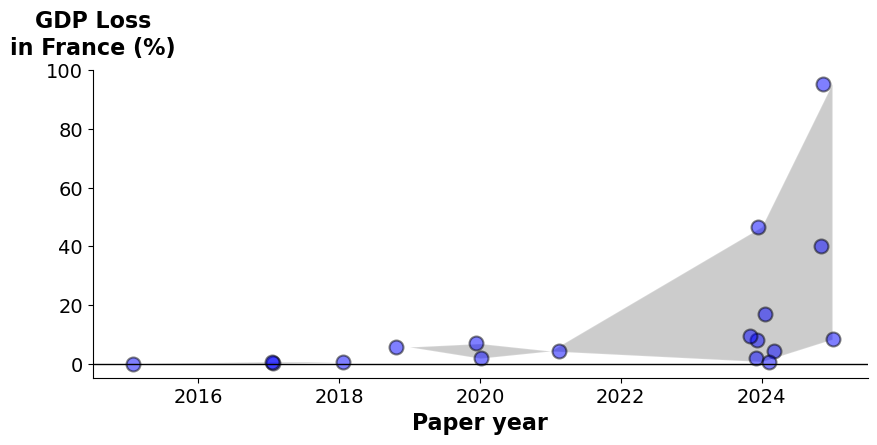

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the combined DataFrame for papers with Paper year <= 2024
filtered_df = all_sectors_df[all_sectors_df['Paper year'] <= 2025]
filtered_df = filtered_df[(filtered_df['Warming'] >= 3.5) & (filtered_df['Warming'] <= 4.4)]

# Group by 'Paper year' and calculate the min and max GDP Loss for each year
grouped_df = filtered_df.groupby('Paper year')['GDP Loss (%)'].agg(['min', 'max']).reset_index()
filtered_df['Paper year'] = filtered_df['Paper year'] + np.random.uniform(-0.2, 0.2, size=len(filtered_df))
# Plot the filtered data
plt.figure(figsize=(10, 4))
plt.fill_between(grouped_df['Paper year'], grouped_df['min'], grouped_df['max'], color='black', alpha=0.2,edgecolor='white')
plt.scatter(
     filtered_df['Paper year'], 
     filtered_df['GDP Loss (%)'], 
     color='blue', 
     edgecolor='black', 
     alpha=0.5, 
     s=100, 
     linewidth=1.5
)
plt.xlabel('Paper year')
plt.legend(frameon=False)

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a text above the figure
plt.text(0, 1.05, 'GDP Loss\nin France (%)', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)

plt.xlabel('Paper year', fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
# Adjust the legend to display in two columns
plt.grid(False)  # Suppress the grid under the graph
plt.show()

## SM B Fig 3

C:\Users\delah\AppData\Local\Temp\ipykernel_27400\3671374402.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_5_2_4['Temperature Range'] = '~ 2°C'


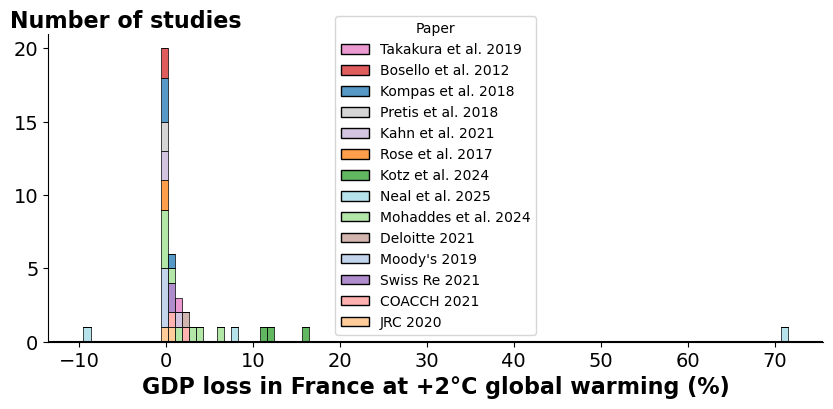

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the combined DataFrame for papers with Paper year > 2010
filtered_df = all_sectors_df
filtered_df = filtered_df.sort_values(by='Year')
unique_papers = filtered_df['Paper'].unique()
color_palette = sns.color_palette("tab20", len(unique_papers))
color_dict = dict(zip(unique_papers, color_palette))

# Filter the DataFrame for the specified temperature range
mean_gdp_loss_df = all_sectors_df.groupby(['Paper', 'Warming']).agg({'GDP Loss (%)': 'mean'}).reset_index()
df_1_5_2_4 = mean_gdp_loss_df[(mean_gdp_loss_df['Warming'] >= 1.5) & (mean_gdp_loss_df['Warming'] <= 2.4)]

df_1_5_2_4 = all_sectors_df[(all_sectors_df['Warming'] >= 1.5) & (all_sectors_df['Warming'] <= 2.4)]

# Add a column to indicate the temperature range
df_1_5_2_4['Temperature Range'] = '~ 2°C'

# Create the distribution plot
plt.figure(figsize=(10, 4))
sns.histplot(data=df_1_5_2_4, x='GDP Loss (%)', hue='Paper', multiple='stack', bins=100, palette=color_dict, legend=True)

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)

# Add a text above the figure
plt.text(0.1, 1.02, 'Number of studies', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)
plt.xlabel('GDP loss in France at +2°C global warming (%)', fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.yticks(ticks=range(0, 25, 5))    # Set y-axis ticks from 0 to 25 with a step of 5
plt.grid(False)  # Suppress the grid under the graph
plt.show()


C:\Users\delah\AppData\Local\Temp\ipykernel_27400\76292060.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_5_2_4['Temperature Range'] = '~ 2°C'


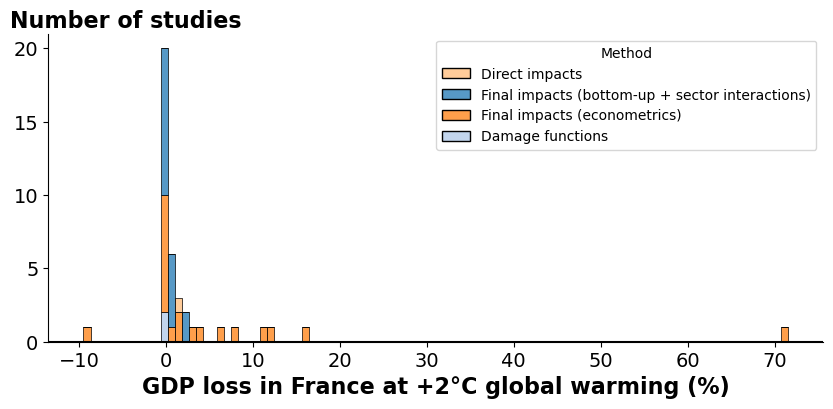

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the combined DataFrame for papers with Paper year > 2010
filtered_df = all_sectors_df
filtered_df = filtered_df.sort_values(by='Year')
unique_method = filtered_df['Method'].unique()
color_palette = sns.color_palette("tab20", len(unique_method))
color_dict_method = dict(zip(unique_method, color_palette))

# Filter the DataFrame for the specified temperature range
mean_gdp_loss_df = all_sectors_df.groupby(['Paper', 'Warming']).agg({'GDP Loss (%)': 'mean'}).reset_index()
df_1_5_2_4 = mean_gdp_loss_df[(mean_gdp_loss_df['Warming'] >= 1.5) & (mean_gdp_loss_df['Warming'] <= 2.4)]

df_1_5_2_4 = all_sectors_df[(all_sectors_df['Warming'] >= 1.5) & (all_sectors_df['Warming'] <= 2.4)]

# Add a column to indicate the temperature range
df_1_5_2_4['Temperature Range'] = '~ 2°C'

# Create the distribution plot
plt.figure(figsize=(10, 4))
sns.histplot(data=df_1_5_2_4, x='GDP Loss (%)', hue='Method', multiple='stack', bins=100, palette=color_dict_method, legend=True)

# Add a thick black horizontal line at 0% GDP Loss
plt.axhline(0, color='black', linewidth=1.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)

# Add a text above the figure
plt.text(0.1, 1.02, 'Number of studies', 
     fontsize=16, fontweight='bold', ha='center', transform=plt.gca().transAxes)
plt.xlabel('GDP loss in France at +2°C global warming (%)', fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.yticks(ticks=range(0, 25, 5))    # Set y-axis ticks from 0 to 25 with a step of 5
plt.grid(False)  # Suppress the grid under the graph
plt.show()


{'Kompas et al. 2018': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765),
 "Moody's 2019": (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'Rose et al. 2017': (1.0, 0.4980392156862745, 0.054901960784313725),
 'JRC 2020': (1.0, 0.7333333333333333, 0.47058823529411764),
 'Kotz et al. 2024': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'Mohaddes et al. 2024': (0.596078431372549,
  0.8745098039215686,
  0.5411764705882353),
 'Bosello et al. 2012': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392),
 'COACCH 2021': (1.0, 0.596078431372549, 0.5882352941176471),
 'Swiss Re 2021': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Kahn et al. 2021': (0.7725490196078432,
  0.6901960784313725,
  0.8352941176470589),
 'Dellink et al. 2019': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354),
 'Deloitte 2021': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'Takakura et al. 2019': (0.890